In [80]:
import pandas as pd
import unicodedata
import re

In [81]:
df = pd.read_excel(r'C:\Users\Luci\Desktop\simulacion.xlsx', header=0, skiprows=[1])

# Convertir todas las columnas a texto
for col in df.columns:
    df[col] = df[col].astype(str)


df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].map(lambda x: ''.join((c for c in unicodedata.normalize('NFD', x) if unicodedata.category(c) != 'Mn')).replace('.', '') if isinstance(x, str) else x)

# Ahora puedes procesar

In [82]:
def procesar_datos_victima(row, i,es_primer_victima,victim_id):
    # Procesa y devuelve los datos de una víctima específica
    victima_data = {
        'id_causa': row['id_causa'],
        'id_victima': victim_id,
        #'vic_rol_rit': row['rol_rit'],
        'vic_edad': row.get(f'vic{i}_edad', None),
        'vic_sexo': row.get(f'vic{i}_sexo', "sin informacion"),
        'vic_nacionalidad': row.get(f"vic{i}_nacionalidad", "sin informacion"),
        'vic_nacionalidad_Extranjera': row.get(f"vic{i}_nacionalidad_extranjera", "sin informacion"),
        'vic_profesion': row.get(f"vic{i}_profesion","Sin informacion"),
        'vic_estudios': row.get(f'vic{i}_estudios',"Sin informacion"),
        'vic_parentesco_acusado': row.get(f'vic{i}_parentesco_acusado',"sin informacion"),
        'vic_parentesco_acusado_otro': row.get(f'vic{i}_parentesco_acusado_otro',"sin informacion"),
        'vic_caracter_lesion': row.get(f'vic{i}_caracter_lesion',"sin informacion"),
        'vic_descripcion_lesion': row.get(f'vic{i}_descripcion_lesion',"sin informacion"),
        'vic_estado_temperancia': row.get(f'vic{i}_estado_temperancia',"sin informacion"),
        'vic_estado_temperancia_otro': row.get(f'vic{i}_estado_temperancia_otro',"sin informacion"),
        'vic_descripcion_temperancia': row.get(f'vic{i}_descripcion_temperancia',"sin informacion"),
        'vic_comuna': row.get(f'vic{i}_comuna',"sin informacion"),
        'vic_estado_civil': row.get(f'vic{i}_estado_civil',"sin informacion"),
        
        'vic_parentesco_demandante': row.get(f'vic{i}_parentesco_demandante',"sin informacion"),
        'vic_parentesco_demandante_otro': row.get(f'vic{i}_parentesco_demandante_otro',"sin informacion"),
        'vic_caracter_lesion_antecedentes': row.get(f'vic1_caracter_lesion_antecedentes','sin informacion'),
        'vic_estado_temperancia_antecedentes': row.get(f'vic{i}_estado_temperancia_antecedentes'),
        
        #Campos nuevos!!!!!!!!
        'vic_violencia_patrimonial': row.get(f'vic{i}_violencia_patrimonial'),
        'vic_violencia_economica': row.get(f'vic{i}_violencia_economica'),
        'vic_ayuda_tecnica': row.get(f'vic{i}_ayuda_tecnica'),
        'vic_ayuda_tecnica_tipo': row.get(f'vic{i}_ayuda_tecnica_tipo'),
        'vic_deterioro_cognitivo': row.get(f'vic{i}_deterioro_cognitivo'),
        'vic_informe_medico': row.get(f'vic{i}_informe_medico'),
        'vic_num_enfermedades': row.get(f'vic{i}_num_enfermedades'),
        'vic_listado_enfermedades': row.get(f'vic{i}_listado_enfermedades'),
        'vic_inasistencias_salud':row.get(f'vic{i}_inasistencias_salud'),
        'vic_informes_social': row.get(f'vic{i}_informes_social'),
        'vic_comuna_ingreso': "sin informacion" if not es_primer_victima else row.get(f'vic_comuna_ingreso'),


         # Campos de convivencia
        'vic_tipo_hogar': row.get(f'vic{i}_tipo_hogar', 'sin informacion'),
        'vic_vive_con_conyuge': row.get(f'vic{i}_vive_con_conyuge', 'sin informacion'),
        'vic_vive_con_exconyuge': row.get(f'vic{i}_vive_con_exconyuge', 'sin informacion'),
        'vic_vive_con_pareja': row.get(f'vic{i}_vive_con_pareja', 'sin informacion'),
        'vic_vive_con_expareja': row.get(f'vic{i}_vive_con_expareja', 'sin informacion'),
        'vic_vive_con_conviviente_auc': row.get(f'vic{i}_vive_con_conviviente_auc', 'sin informacion'),
        'vic_vive_con_exconviviente_auc': row.get(f'vic{i}_vive_con_exconviviente_auc', 'sin informacion'),
        'vic_vive_con_conviviente_hecho': row.get(f'vic{i}_vive_con_conviviente_hecho', 'sin informacion'),
        'vic_vive_con_exconviviente_hecho': row.get(f'vic{i}_vive_con_exconviviente_hecho', 'sin informacion'),
        'vic_vive_con_papa': row.get(f'vic{i}_vive_con_papa', 'sin informacion'),
        'vic_vive_con_mama': row.get(f'vic{i}_vive_con_mama', 'sin informacion'),
        'vic_vive_con_padrastro': row.get(f'vic{i}_vive_con_padrastro', 'sin informacion'),
        'vic_vive_con_madrastra': row.get(f'vic{i}_vive_con_madrastra', 'sin informacion'),
        'vic_vive_con_1_hijo': row.get(f'vic{i}_vive_con_1_hijo', 'sin informacion'),
        'vic_vive_con_hijos': row.get(f'vic{i}_vive_con_hijos', 'sin informacion'),
        'vic_vive_con_1_hija': row.get(f'vic{i}_vive_con_1_hija', 'sin informacion'),
        'vic_vive_con_hijas': row.get(f'vic{i}_vive_con_hijas', 'sin informacion'),
        'vic_vive_con_hijastro': row.get(f'vic{i}_vive_con_hijastro', 'sin informacion'),
        'vic_vive_con_hijastra': row.get(f'vic{i}_vive_con_hijastra', 'sin informacion'),
        'vic_vive_con_1_hermano': row.get(f'vic{i}_vive_con_1_hermano', 'sin informacion'),
        'vic_vive_con_hermanos': row.get(f'vic{i}_vive_con_hermanos', 'sin informacion'),
        'vic_vive_con_1_hermana': row.get(f'vic{i}_vive_con_1_hermana', 'sin informacion'),
        'vic_vive_con_hermanas': row.get(f'vic{i}_vive_con_hermanas', 'sin informacion'),
        'vic_vive_con_hermanastro': row.get(f'vic{i}_vive_con_hermanastro', 'sin informacion'),
        'vic_vive_con_hermanastra': row.get(f'vic{i}_vive_con_hermanastra', 'sin informacion'),
        'vic_vive_con_tio': row.get(f'vic{i}_vive_con_tio', 'sin informacion'),
        'vic_vive_con_tia': row.get(f'vic{i}_vive_con_tia', 'sin informacion'),
        'vic_vive_con_suegro': row.get(f'vic{i}_vive_con_suegro', 'sin informacion'),
        'vic_vive_con_suegra': row.get(f'vic{i}_vive_con_suegra', 'sin informacion'),
        'vic_vive_con_abuelo': row.get(f'vic{i}_vive_con_abuelo', 'sin informacion'),
        'vic_vive_con_abuela': row.get(f'vic{i}_vive_con_abuela', 'Sin informacion'),
        'vic_vive_con_nieto': row.get(f'vic{i}_vive_con_nieto', 'sin informacion'),
        'vic_vive_con_nieta': row.get(f'vic{i}_vive_con_nieta', 'sin informacion'),
        'vic_vive_con_otro': row.get(f'vic{i}_vive_con_otro', 'sin informacion'),   
        # representante legal en preparatoria y en jucio

        'vic_representante_legal': row.get(f'vic{i}_representante_legal', 'Sin informacion'),
        'juicio_vic_representante_legal': row.get(f'juicio_vic{i}_representante_legal', 'Sin informacion'),
        'tiempo_relacion_victima_acusado':row.get('tiempo_relacion_victima_acusado', "sin informacion"),
        
        # Campos de convivencia y otros
        'cambio_vic_tipo_hogar': row.get(f'cambio_vic{i}_tipo_hogar'),
        'cambio_vic_vive_con_conyuge': row.get(f'cambio_vic{i}_vive_con_conyuge', "sin informacion"),
        'cambio_vic_vive_con_exconyuge': row.get(f'cambio_vic{i}_vive_con_exconyuge', "sin informacion"),
        'cambio_vic_vive_con_pareja': row.get(f'cambio_vic{i}_vive_con_pareja', "sin informacion"),
        'cambio_vic_vive_con_expareja': row.get(f'cambio_vic{i}_vive_con_expareja', "sin informacion"),
        'cambio_vic_vive_con_conviviente_auc': row.get(f'cambio_vic{i}_vive_con_conviviente_auc', "sin informacion"),
        'cambio_vic_vive_con_exconviviente_auc': row.get(f'cambio_vic{i}_vive_con_exconviviente_auc', "sin informacion"),
        'cambio_vic_vive_con_conviviente_hecho': row.get(f'cambio_vic{i}_vive_con_conviviente_hecho', "sin informacion"),
        'cambio_vic_vive_con_exconviviente_hecho': row.get(f'cambio_vic{i}_vive_con_exconviviente_hecho', "sin informacion"),
        'cambio_vic_vive_con_papa': row.get(f'cambio_vic{i}_vive_con_papa', "sin informacion"),
        'cambio_vic_vive_con_mama': row.get(f'cambio_vic{i}_vive_con_mama', "sin informacion"),
        'cambio_vic_vive_con_padrastro': row.get(f'cambio_vic{i}_vive_con_padrastro', "sin informacion"),
        'cambio_vic_vive_con_madrastra': row.get(f'cambio_vic{i}_vive_con_madrastra', "sin informacion"),
        'cambio_vic_vive_con_1_hijo': row.get(f'cambio_vic{i}_vive_con_1_hijo', "sin informacion"),
        'cambio_vic_vive_con_hijos': row.get(f'cambio_vic{i}_vive_con_hijos', "sin informacion"),
        'cambio_vic_vive_con_1_hija': row.get(f'cambio_vic{i}_vive_con_1_hija', "sin informacion"),
        'cambio_vic_vive_con_hijas': row.get(f'cambio_vic{i}_vive_con_hijas', "sin informacion"),
        'cambio_vic_vive_con_hijastro': row.get(f'cambio_vic{i}_vive_con_hijastro', "sin informacion"),
        'cambio_vic_vive_con_hijastra': row.get(f'cambio_vic{i}_vive_con_hijastra', "sin informacion"),
        'cambio_vic_vive_con_1_hermano': row.get(f'cambio_vic{i}_vive_con_1_hermano', "sin informacion"),
        'cambio_vic_vive_con_hermanos': row.get(f'cambio_vic{i}_vive_con_hermanos', "sin informacion"),
        'cambio_vic_vive_con_1_hermana': row.get(f'cambio_vic{i}_vive_con_1_hermana', "sin informacion"),
        'cambio_vic_vive_con_hermanas': row.get(f'cambio_vic{i}_vive_con_hermanas', "sin informacion"),
        'cambio_vic_vive_con_hermanastro': row.get(f'cambio_vic{i}_vive_con_hermanastro', "sin informacion"),
        'cambio_vic_vive_con_hermanastra': row.get(f'cambio_vic{i}_vive_con_hermanastra', "sin informacion"),
        'cambio_vic_vive_con_tio': row.get(f'cambio_vic{i}_vive_con_tio', "sin informacion"),
        'cambio_vic_vive_con_tia': row.get(f'cambio_vic{i}_vive_con_tia', "sin informacion"),
        'cambio_vic_vive_con_suegro': row.get(f'cambio_vic{i}_vive_con_suegro', "sin informacion"),
        'cambio_vic_vive_con_suegra': row.get(f'cambio_vic{i}_vive_con_suegra', "sin informacion"),
        'cambio_vic_vive_con_abuelo': row.get(f'cambio_vic{i}_vive_con_abuelo', "sin informacion"),
        'cambio_vic_vive_con_abuela': row.get(f'cambio_vic{i}_vive_con_abuela', "sin informacion"),
        'cambio_vic_vive_con_nieto': row.get(f'cambio_vic{i}_vive_con_nieto', "sin informacion"),
        'cambio_vic_vive_con_nieta': row.get(f'cambio_vic{i}_vive_con_nieta', "sin informacion"),
        'cambio_vic_vive_con_otro': row.get(f'cambio_vic{i}_vive_con_otro', "sin informacion")
    }
    return victima_data

In [83]:
def procesar_datos_denunciante(row, j, es_primer_denunciante, id_denunciado):
    # Procesa y devuelve los datos de un denunciante específico
    denounced_data = {
        'id_causa': row['id_causa'],
        'id_denunciado': id_denunciado,
        'den_edad': row.get(f'den{j}_edad', None),
        'den_sexo': row.get(f'den{j}_sexo',"sin informacion"),
        'den_nacionalidad': row.get(f'den{j}_nacionalidad',"sin informacion"),
        'den_nacionalidad_extranjera': row.get(f'den{j}_nacionalidad_extranjera',"sin informacion"),
        'den_profesion': row.get(f'den{j}_profesion',"sin informacion"),
        'den_estudios': row.get(f'den{j}_estudios',"sin informacion"),
        'den_caracter_lesion': row.get(f'den{j}_caracter_lesion',"sin informacion"),
        'den_descripcion_lesion': row.get(f'den{j}_descripcion_lesion',"sin informacion"),
        'den_estado_temperancia': row.get(f'den{j}_estado_temperancia',"sin informacion"),
        'den_estado_temperancia_otro': row.get(f'den{j}_estado_temperancia_otro', "sin informacion"),
        'den_descripcion_temperancia': row.get(f'den{j}_descripcion_temperancia',"sin informacion"),
        'den_comuna': row.get(f'den{j}_comuna', "sin informacion"),
        'den_estado_civil': row.get(f'den{j}_estado_civil','sin informacion'),
        'den_otros_antecedentes': row.get(f'den{j}_otros_antecedentes',"sin informacion"),

        # Antecedentes de los denunciados
        'antecedente_aborto': row.get(f'den{j}_ant_aborto',"sin informacion"),
        'antecedente_abandono': row.get(f'den{j}_ant_abandono',"sin informacion"),
        'antecedente_violacion': row.get(f'den{j}_ant_violacion',"sin informacion"),
        'antecedente_estupro': row.get(f'den{j}_ant_estupro',"sin informacion"),
        'antecedente_abuso_sexual': row.get(f'den{j}_ant_abuso_sexual',"sin informacion"),
        'antecedente_pornografia': row.get(f'den{j}_ant_pornografia',"sin informacion"),
        'antecedente_prostitucion_menores': row.get(f'den{j}_ant_prost_menores',"sin informacion"),
        'antecedente_incesto': row.get(f'den{j}_ant_incesto',"sin informacion"),
        'antecedente_parricidio': row.get(f'den{j}_ant_parricidio',"sin informacion"),
        'antecedente_femicidio': row.get(f'den{j}_ant_femicidio',"sin informacion"),
        'antecedente_homicidio': row.get(f'den{j}_ant_homicidio',"sin informacion"),
        'antecedente_infanticidio': row.get(f'den{j}_ant_infanticidio',"sin informacion"),
        'antecedente_lesiones_corporales': row.get(f'den{j}_ant_lesiones',"sin informacion"),
        'antecedente_maltrato': row.get(f'den{j}_ant_maltrato',"sin informacion"),
        'antecedente_trafico_migrantes': row.get(f'den{j}_ant_trafico_migrantes',"sin informacion"),
        'antecedente_trata_personas': row.get(f'den{j}_ant_trata_personas',"sin informacion"),
        'antecedente_robo': row.get(f'den{j}_ant_robo',"sin informacion"),
        'antecedente_hurto': row.get(f'den{j}_ant_hurto',"sin informacion"),
        'antecedente_estafa': row.get(f'den{j}_ant_estafa',"sin informacion"),
        'antecedente_incendio': row.get(f'den{j}_ant_incendio',"sin informacion"),
        'antecedente_trafico_estupefacientes': row.get(f'den{j}_ant_trafico_drogas',"sin informacion"),
        'antecedente_registro_vif': row.get(f'den{j}_ant_reg_especial_vif',"sin informacion"),
        #representante legal en preparatoria y jucui

        'den_representante_legal': row.get(f'den{j}_representante_legal','sin informacion'),
        'juicio_den_representante_legal': row.get(f'juicio_den{j}_representante_legal','sin informacion'),
        #riesgo vif
        'vif_parentesco_denunciado': "sin informacion" if not es_primer_denunciante else row.get('vif_parentesco_denunciado', "sin informacion"),
        'vif_parentesco_denunciado_otro': "sin informacion" if not es_primer_denunciante else row.get('vif_parentesco_denunciado_otro', "sin informacion"),
        'vif_hijos_menores': "sin informacion" if not es_primer_denunciante else row.get('vif_hijos_menores', "sin informacion"),
        'vif_hecho_golpes': "sin informacion" if not es_primer_denunciante else row.get('vif_hecho_golpes', "sin informacion"),
        'vif_hecho_lesiones': "sin informacion" if not es_primer_denunciante else row.get('vif_hecho_lesiones', "sin informacion"),
        'vif_hecho_amenaza_muerte': "sin informacion" if not es_primer_denunciante else row.get('vif_hecho_amenaza_muerte', "sin informacion"),
        'vif_hecho_uso_arma': "sin informacion" if not es_primer_denunciante else row.get('vif_hecho_uso_arma', "sin informacion"),
        'vif_hecho_violencia_sexual': "sin informacion" if not es_primer_denunciante else row.get('vif_hecho_violencia_sexual', "sin informacion"),
        'vif_denunciado_acceso_armas': "sin informacion" if not es_primer_denunciante else  row.get('vif_denunciado_acceso_armas', "sin informacion"),
        'vif_denunciado_consumo_sustancias': "sin informacion" if not es_primer_denunciante else  row.get('vif_denunciado_consumo_sustancias', "sin informacion"),
        'vif_denunciado_violencia_consumo': "sin informacion" if not es_primer_denunciante else row.get('vif_denunciado_violencia_consumo', "sin informacion"),
        'vif_denunciado_trastorno_psiquiatrico': "sin informacion" if not es_primer_denunciante else  row.get('vif_denunciado_trastorno_psiquiatrico', "sin informacion"),
        'vif_historia_golpes_previos': "sin informacion" if not es_primer_denunciante else row.get('vif_historia_golpes_previos', "sin informacion"),
        'vif_historia_aumento_golpes': "sin informacion" if not es_primer_denunciante else row.get('vif_historia_aumento_golpes', "sin informacion"),
        'vif_historia_amenaza_arma': "sin informacion" if not es_primer_denunciante else row.get('vif_historia_amenaza_arma', "sin informacion"),
        'vif_historia_amenaza_muerte_previa': "sin informacion" if not es_primer_denunciante else row.get('vif_historia_amenaza_muerte_previa', "sin informacion"),
        'vif_historia_violencia_menores': "sin informacion" if not es_primer_denunciante else  row.get('vif_historia_violencia_menores', "sin informacion"),
        'vif_historia_celos_violentos': "Sin informacion" if not es_primer_denunciante else row.get('vif_historia_celos_violentos', "sin informacion"),
        'vif_historia_separacion': "Sin informacion" if not es_primer_denunciante else row.get('vif_historia_separacion', "sin informacion"),
        'vif_historia_rechazo_separacion': "Sin informacion" if not es_primer_denunciante else row.get('vif_historia_rechazo_separacion', "sin informacion"),
        'vif_usted_discapacidad': "Sin informacion" if not es_primer_denunciante else row.get('vif_usted_discapacidad', "sin informacion"),
        'vif_usted_embarazo': "Sin informacion" if not es_primer_denunciante else  row.get('vif_usted_embarazo', "sin informacion"),
        'vif_usted_convivencia_denunciado': "Sin informacion" if not es_primer_denunciante else row.get('vif_usted_convivencia_denunciado', "sin informacion"),
        'vif_usted_dependencia_economica': "Sin informacion" if not es_primer_denunciante else row.get('vif_usted_dependencia_economica', "sin informacion"),
        'vif_reaccion_denuncia_agresion': "Sin informacion" if not es_primer_denunciante else row.get('vif_reaccion_denuncia_agresion', "sin informacion"),
        'vif_reaccion_denuncia_riesgo_fatal': "Sin informacion" if not es_primer_denunciante else  row.get('vif_reaccion_denuncia_riesgo_fatal', "sin informacion"),
        'vif_imputado_denuncias_vif': "Sin informacion" if not es_primer_denunciante else row.get('vif_imputado_denuncias_vif', "sin informacion"),
        'vif_imputado_condenas_vif': "Sin informacion" if not es_primer_denunciante else row.get('vif_imputado_condenas_vif', "sin informacion"),
        'vif_imputado_desacato_vif': "Sin informacion" if not es_primer_denunciante else row.get('vif_imputado_desacato_vif', "sin informacion"),
        'vif_imputado_delitos_pendientes': "Sin informacion" if not es_primer_denunciante else row.get('vif_imputado_delitos_pendientes', "sin informacion"),
        'vif_resultado_numero': "Sin informacion" if not es_primer_denunciante else row.get('vif_resultado_numero', "sin informacion"),
        'vif_resultado_nivel': "Sin informacion" if not es_primer_denunciante else row.get('vif_resultado_nivel', "sin informacion"),

    }
    return denounced_data

In [84]:
def procesar_datos_denunciantes(row):
    # Procesa y devuelve los datos de un denunciante específico
    datos_denunciante = {
        'id_causa': row['id_causa'],
        'dnt_es_victima': row.get('dnt_es_victima', "sin informacion"),
        'dnt_es_persona_juridica': row.get('dnt_es_persona_juridica', "sin informacion"),
        'dtn_persona_juridica_cual': row.get('dnt_persona_juridica_cual', "sin informacion"),
        'dtn_edad': row.get('dnt_edad', "sin informacion"),
        'dtn_sexo': row.get('dnt_sexo', "sin informacion"),
        'dtn_nacionalidad': row.get('dnt_nacionalidad', "sin informacion"),
        'dtn_nacionalidad_extranjera': row.get('dnt_nacionalidad_extranjera', "sin informacion"),
        'dtn_profesion': row.get('dnt_profesion', "sin informacion"),
        'dtn_estudios': row.get('dnt_estudios', "sin informacion"),
        'dtn_parentesco_acusado': row.get('dnt_parentesco_acusado', "sin informacion"),
        'dtn_parentesco_acusado_otro': row.get('dnt_parentesco_acusado_otro', "sin informacion"),
        'dtn_caracter_lesion': row.get('dnt_caracter_lesion', "sin informacion"),
        'dtn_descripcion_lesion': row.get('dnt_descripcion_lesion', "sin informacion"),
        'dtn_estado_temperancia': row.get('dnt_estado_temperancia', "sin informacion"),
        'dtn_estado_temperancia_otro': row.get('dnt_estado_temperancia_otro', "sin informacion"),
        'dtn_descripcion_temperancia': row.get('dnt_descripcion_temperancia', "sin informacion"),
        'dtn_comuna': row.get('dnt_comuna', "sin informacion"),
        'dtn_estado_civil': row.get('denunciante_estado_civil', "sin informacion"),
        'dtn_estado_temperancia': row.get('dnt_estado_temperancia', "sin informacion"),
        'dnt_estado_temperancia_otro': row.get(f'dnt_estado_temperancia_otro'),
        'dtn_representante_Legal': row.get('dnt_representante_legal', "sin informacion"),
        'dtn_juicio_representante_legal': row.get('juicio_dnt_representante_legal', "sin informacion"),
    }
    return datos_denunciante


In [85]:
def procesar_medidas_policiales(row):
    # Procesa y devuelve los datos de las medidas de la audiencia preparatoria
    medidas_data = {
        'id_causa': row['id_causa'],
        'rondas_domicilio': row.get('medidas_provisorias_rondas_domicilio', "sin informacion"),
        'telefono_cuadrante': row.get('medidas_provisorias_telefono_cuadrante', "sin informacion"),
        'prohibicion_acercamiento': row.get('medidas_provisorias_prohibicion_acercamiento', "sin informacion"),
        'restriccion_presencia_ofensor': row.get('medidas_provisorias_restriccion_presencia_ofensor', "sin informacion"),
        'entrega_efectos_personales': row.get('medidas_provisorias_entrega_efectos_personales', "sin informacion"),
        'fijacion_alimentos': row.get('medidas_provisorias_fijacion_alimentos', "sin informacion"),
        'regimen_cuidado_nna': row.get('medidas_provisorias_regimen_cuidado_nna', "sin informacion"),
        'prohibicion_actos_contratos': row.get('medidas_provisorias_prohibicion_actos_contratos', "sin informacion"),
        'prohibicion_armas': row.get('medidas_provisorias_prohibicion_armas', "sin informacion"),
        'reserva_identidad_denunciante': row.get('medidas_provisorias_reserva_identidad_denunciante', "sin informacion"),
        'proteccion_adultos_mayores_discapacidad': row.get('medidas_provisorias_proteccion_adultos_mayores_discapacidad', "sin informacion"),
        'asistencia_terapeutica': row.get('medidas_provisorias_asistencia_terapeutica', "sin informacion"),
        'presentacion_unidad_policial': row.get('medidas_provisorias_presentacion_unidad_policial', "sin informacion"),
        'otra_cautelar': row.get('medidas_provisorias_otra', "sin informacion"),
    }
    return medidas_data

In [86]:
def procesar_medidas_audiencia_preparatoria(row):
    # Procesa y devuelve los datos de las medidas de la audiencia preparatoria
    medidas_data = {
        'id_causa': row['id_causa'],
        'rondas_domicilio': row.get('medidas_rondas_domicilio', "sin informacion"),
        'telefono_cuadrante': row.get('medidas_telefono_cuadrante', "sin informacion"),
        'prohibicion_acercamiento': row.get('medidas_prohibicion_acercamiento_victima', "sin informacion"),
        'restriccion_presencia_ofensor': row.get('medidas_restriccion_presencia_ofensor', "sin informacion"),
        'entrega_efectos_personales': row.get('medidas_entrega_efectos_personales', "sin informacion"),
        'fijacion_alimentos': row.get('medidas_fijar_alimentos_provisorios', "sin informacion"),
        'regimen_cuidado_nna': row.get('medidas_regimen_cuidado_nna', "sin informacion"),
        'prohibicion_actos_contratos': row.get('medidas_prohibicion_actos_contratos', "sin informacion"),
        'prohibicion_armas': row.get('medidas_prohibicion_porte_armas', "sin informacion"),
        'reserva_identidad_denunciante': row.get('medidas_reserva_identidad_denunciante', "sin informacion"),
        'proteccion_adultos_mayores_discapacidad': row.get('medidas_proteccion_adultos_mayores_discapacidad', "sin informacion"),
        'asistencia_terapeutica': row.get('medidas_asistencia_terapeutica', "sin informacion"),
        'presentacion_unidad_policial': row.get('medidas_presentacion_unidad_policial', "sin informacion"),
        'otra_cautelar': row.get('medidas_otra_cautelar', "sin informacion"),
    }
    return medidas_data

In [87]:
def procesar_medidas_juicio(row):
    # Procesa y devuelve los datos de las medidas del juicio
    medidas_juicio_data = {
        'id_causa': row['id_causa'],
        'rondas_domicilio': row.get('juicio_medidas_rondas_domicilio', "sin informacion"),
        'telefono_cuadrante': row.get('juicio_medidas_telefono_cuadrante', "sin informacion"),
        'prohibicion_acercamiento': row.get('juicio_medidas_prohibicion_acercamiento_victima', "sin informacion"),
        'restriccion_presencia_ofensor': row.get('juicio_medidas_restriccion_presencia_ofensor', "sin informacion"),
        'entrega_efectos_personales': row.get('juicio_medidas_entrega_efectos_personales', "sin informacion"),
        'fijacion_alimentos': row.get('juicio_medidas_fijar_alimentos_provisorios', "sin informacion"),
        'regimen_cuidado_nna': row.get('juicio_medidas_regimen_cuidado_nna', "sin informacion"),
        'prohibicion_actos_contratos': row.get('juicio_medidas_prohibicion_actos_contratos', "sin informacion"),
        'prohibicion_armas': row.get('juicio_medidas_prohibicion_porte_armas', "sin informacion"),
        'reserva_identidad_denunciante': row.get('juicio_medidas_reserva_identidad_denunciante', "sin informacion"),
        'proteccion_adultos_mayores_discapacidad': row.get('juicio_medidas_proteccion_adultos_mayores_discapacidad', "sin informacion"),
        'asistencia_terapeutica': row.get('juicio_medidas_asistencia_terapeutica', "sin informacion"),
        'presentacion_unidad_policial': row.get('juicio_medidas_presentacion_unidad_policial', "sin informacion"),
        'otra_cautelar': row.get('juicio_medidas_otra_cautelar', "sin informacion"),
    }
    return medidas_juicio_data

In [88]:
def procesar_datos_causa(row):
    # Procesa y devuelve los datos específicos de la causa
    datos_causa = {
        'id_causa': row['id_causa'],
        'digitador': row.get('digitador', "sin informacion"),
        #'rol_rit': row.get('rol_rit', "sin informacion"),
        'fecha_ingreso': row.get('fecha_ingreso', "sin informacion"),
        'cuaderno': row.get('cuaderno', "sin informacion"),
        'procedimiento': row.get('procedimiento', "sin informacion"),
        'materia': row.get('materia', "sin informacion"),
        'estado_admin': row.get('estado_admin', "sin informacion"),
        'ubicacion': row.get('ubicacion', "sin informacion"),
        'cuaderno': row.get('cuaderno', "sin informacion"),
        'etapa': row.get('etapa', "sin informacion"),
        'estado_proceso': row.get('estado_proceso', "sin informacion"),
        'etapa_actual': row.get('etapa_actual', "sin informacion"),
        'etapa_actual_otro': row.get('etapa_actual_otro', "sin informacion"),
        'via_ingreso': row.get('via_ingreso', "sin informacion"),
        'causa_proteccion_abierta': row.get('causa_proteccion_abierta', "sin informacion"),
        'causa_penal_abierta': row.get('causa_penal_abierta', "sin informacion"),
        'demanda_reconvencional': row.get('demanda_reconvencional', "sin informacion"),
        'solicitan_informes_oficios': row.get('solicitan_informes_oficios', "sin informacion"),
        'composicion_hogar_convivencia_victimas': row.get('composicion_hogar_convivencia_victimas', "sin informacion")
    }
    return datos_causa


In [89]:
def procesar_datos_juicio(row):
    # Procesa y devuelve los datos específicos del juicio
    datos_juicio = {
        'id_causa': row['id_causa'],
        'audiencia_suspendida': row.get('juicio_audiencia_suspendida', "sin informacion"),
        'dnt_representante_legal': row.get('juicio_dnt_representante_legal', "sin informacion"),
        'fecha_realizacion': row.get('juicio_fecha_realizacion', "sin informacion"),
        'resolucion': row.get('juicio_resolucion', "sin informacion"),
        'sentencia_cual': row.get('juicio_sentencia_cual', "sin informacion"),
        'salida_colaborativa_cual': row.get('juicio_salida_colaborativa_cual', "sin informacion"),
        'recurso_procesal': row.get('sentencia_recurso_procesal', "sin informacion"),
        'recurso_procesal_otro': row.get('sentencia_recurso_procesal_otro', "sin informacion"),
        'cumplimiento_abierta': row.get('causa_cumplimiento_abierta', "sin informacion"),
        'cumplimiento_rol_rit': row.get('causa_cumplimiento_rol_rit', "sin informacion"),
    }
    return datos_juicio

In [90]:
def procesar_antedecentes_delito_y_medida(row):
    # Procesa y devuelve los antecedentes específicos del delito
    antecedentes_delito = {
        'id_causa': row['id_causa'],
        'codigo_delito': row.get('codigo_delito', "sin informacion"),
        'fecha_delito': row.get('fecha_delito', "sin informacion"),
        'hora_delito': row.get('hora_delito', "sin informacion"),
        'lugar_ocurrencia': row.get('lugar_ocurrencia', "sin informacion"),
        'lugar_ocurrencia_otro': row.get('lugar_ocurrencia_otro', "sin informacion"),
        'comuna_delito': row.get('comuna_delito', "sin informacion"),
        'unidad_policial': row.get('unidad_policial', "sin informacion"),
        'cuadrante_delito': row.get('cuadrante_delito', "sin informacion"),


        #Su medida respectiva
        'rondas_domicilio': row.get('medidas_provisorias_rondas_domicilio', "sin informacion"),
        'telefono_cuadrante': row.get('medidas_provisorias_telefono_cuadrante', "sin informacion"),
        'prohibicion_acercamiento': row.get('medidas_provisorias_prohibicion_acercamiento', "sin informacion"),
        'restriccion_presencia_ofensor': row.get('medidas_provisorias_restriccion_presencia_ofensor', "sin informacion"),
        'entrega_efectos_personales': row.get('medidas_provisorias_entrega_efectos_personales', "sin informacion"),
        'fijacion_alimentos': row.get('medidas_provisorias_fijacion_alimentos', "sin informacion"),
        'regimen_cuidado_nna': row.get('medidas_provisorias_regimen_cuidado_nna', "sin informacion"),
        'prohibicion_actos_contratos': row.get('medidas_provisorias_prohibicion_actos_contratos', "sin informacion"),
        'prohibicion_armas': row.get('medidas_provisorias_prohibicion_armas', "sin informacion"),
        'reserva_identidad_denunciante': row.get('medidas_provisorias_reserva_identidad_denunciante', "sin informacion"),
        'proteccion_adultos_mayores_discapacidad': row.get('medidas_provisorias_proteccion_adultos_mayores_discapacidad', "sin informacion"),
        'asistencia_terapeutica': row.get('medidas_provisorias_asistencia_terapeutica', "sin informacion"),
        'presentacion_unidad_policial': row.get('medidas_provisorias_presentacion_unidad_policial', "sin informacion"),
        'otra_cautelar': row.get('medidas_provisorias_otra', "sin informacion"),


    }
    return antecedentes_delito




In [91]:
def procesar_datos_audiencia(row):
    # Procesa y devuelve los datos específicos de la audiencia
    datos_audiencia = {
        'id_causa': row['id_causa'],
        'fecha_primera_citacion': row.get('fecha_primera_citacion', "sin informacion"),
        'audiencia_suspendida': row.get('audiencia_suspendida', "sin informacion"),
        'fecha_realizacion_audiencia': row.get('fecha_realizacion_audiencia', "sin informacion"),
        'solicitan_informes_oficios': row.get('solicitan_informes_oficios', "sin informacion"),
        'resolucion_audiencia': row.get('prep_aud_resolucion', "sin informacion"),
        'resolucion_salida_colaborativa': row.get('prep_aud_resolucion_salida_colaborativa', "sin informacion"),
        'prep_aud_resolucion_incompetencia_tipo': row.get('prep_aud_resolucion_incompetencia_tipo', "sin informacion"),
        #nuevos campos añadidos

        'prep_aud_informes_solicitados_a_quien': row.get('prep_aud_informes_solicitados_a_quien', "sin informacion"),
        'prep_aud_informes_entregados':row.get('prep_aud_informes_entregados', "sin informacion"),
        'prep_aud_informes_entregados_cuales': row.get('prep_aud_informes_entregados_cuales', "sin informacion"),
        'prep_aud_informes_pendientes': row.get('prep_aud_informes_pendientes', "sin informacion"),
        'prep_aud_demora_entrega_informes': row.get('prep_aud_demora_entrega_informes', "sin informacion"),

        'prep_aud_pericia_solicitada': row.get('prep_aud_pericia_solicitada', "sin informacion"),
        'prep_aud_pericia_cual': row.get('prep_aud_pericia_cual', "sin informacion"),
        'prep_aud_pericia_solicitante': row.get('prep_aud_pericia_solicitante', "sin informacion"),
        
    }
    return datos_audiencia


In [92]:
def procesar_datos_juicio_completo(row):
    # Procesa y devuelve los datos completos del juicio
    datos_juicio_completo = {
        'id_causa': row['id_causa'],
        'fecha_primera_citacion_juicio': row.get('fecha_primera_citacion_juicio', "sin informacion"),
        'cambio_composicion_hogar_juicio': row.get('cambio_composicion_hogar_juicio', "sin informacion"),
        'juicio_audiencia_suspendida': row.get('juicio_audiencia_suspendida', "sin informacion"),
        'juicio_dnt_representante_legal': row.get('juicio_dnt_representante_legal', "sin informacion"),
        'juicio_resolucion': row.get('juicio_resolucion', "sin informacion"),
        'juicio_sentencia_cual': row.get('juicio_sentencia_cual', "sin informacion"),
        'juicio_carabineros_cese_medidas': row.get('juicio_carabineros_cese_medidas', "sin informacion"),
        'sentencia_recurso_procesal': row.get('sentencia_recurso_procesal', "sin informacion"),
        'sentencia_recurso_procesal_otro': row.get('sentencia_recurso_procesal_otro', "sin informacion"),
        'causa_cumplimiento_abierta': row.get('causa_cumplimiento_abierta', "sin informacion"),
        'causa_cumplimiento_rol_rit': row.get('causa_cumplimiento_rol_rit', 'sin informacion'),
        #campos nuevos
        'juicio_informes_solicitados': row.get('juicio_informes_solicitados','sin informacion'),
        'juicio_informes_entregados': row.get('juicio_informes_entregados','sin informacion'),
        'juicio_informes_entregados_cuales': row.get('juicio_informes_entregados_cuales','sin informacion'),
        'juicio_informes_pendientes': row.get('juicio_informes_pendientes','sin informacion'),
        'juicio_demora_informes': row.get('juicio_demora_informes','sin informacion'),
        'juicio_suspension_condicional': row.get('juicio_suspension_condicional','sin informacion'),
        'juicio_otro_acuerdo_cual': row.get('juicio_otro_acuerdo_cual','sin informacion'),
        'juicio_pericia_solicitada': row.get('juicio_pericia_solicitada', 'sin informacion'),
        'juicio_pericia_cual': row.get('juicio_pericia_cual','sin informacion'),
        'juicio_pericia_solicitante': row.get('juicio_pericia_solicitante','sin informacion'),
        'juicio_pericia_resultado': row.get('juicio_pericia_resultado','sin informacion'),
        'juicio_pericia_evaluado': row.get('juicio_pericia_evaluado', 'sin informacion'),
        'juicio_medidas_cautelares': row.get('juicio_medidas_cautelares','sin informacion'),
        'juicio_medidas_recurso':row.get('juicio_medidas_recurso','juicio_medidas_recurso')
        



    }
    return datos_juicio_completo



In [93]:
# Crear listas vacías para los datos normalizados
normalized_victims_data = []
normalized_denouncers_data = []
normalized_medidas_preparatoria_data = []
normalized_medidas_juicio_data = []
normalized_medidas_policiales_data = []
normalized_datos_juicio = []
normalized_datos_causa = []
normalized_antedecentes_delito_data = []
normalized_datos_audiencia_data = []
normalized_datos_juicio_completo_data = []
normalized_datos_denunciantes = []
max_victims = 5  
max_denounceds = 5 
contador_victimas = 1
contador_denunciado = 1

for index, row in df.iterrows():
    row['id_causa'] = index + 1


    normalized_medidas_policiales_data.append(procesar_medidas_policiales(row))
    normalized_medidas_preparatoria_data.append(procesar_medidas_audiencia_preparatoria(row))
    normalized_medidas_juicio_data.append(procesar_medidas_juicio(row))
    
    normalized_datos_causa.append(procesar_datos_causa(row))
    normalized_antedecentes_delito_data.append(procesar_antedecentes_delito_y_medida(row))
    normalized_datos_audiencia_data.append(procesar_datos_audiencia(row))
    normalized_datos_juicio_completo_data.append(procesar_datos_juicio_completo(row))
    normalized_datos_denunciantes.append(procesar_datos_denunciantes(row))

    for i in range(1, max_victims + 1):
        # Obtenemos la edad y el sexo de la víctima actual
        vic_edad = row.get(f'vic{i}_edad')
        vic_sexo = row.get(f'vic{i}_sexo')
        
        # Verificamos si la fila debe ser procesada
        if (vic_edad not in ["no aplica", "sin informacion", 0,"0"]) or (vic_sexo in ["masculino", "femenino"]):
            es_primer_victima = (i == 1)
            victim_id = contador_victimas
            victim_data = procesar_datos_victima(row, i, es_primer_victima, victim_id)
            normalized_victims_data.append(victim_data)
            contador_victimas += 1
                
    for j in range(1, max_denounceds + 1):
        denounced_age = row.get(f'den{j}_edad')
        denounced_sex = row.get(f'den{j}_sexo')

        # Agregamos la condición para verificar la edad y el sexo
        if (denounced_age not in ["no aplica", "sin informacion", 0,"0"]) or (denounced_sex in ["masculino", "femenino"]):
            es_primer_denunciante = (j == 1)
            denounced_id = contador_denunciado
            denounced_data = procesar_datos_denunciante(row, j, es_primer_denunciante, denounced_id)
            normalized_denouncers_data.append(denounced_data)
            contador_denunciado += 1


# Convertir a DataFrame
df_normalizado_victimas = pd.DataFrame(normalized_victims_data)
df_normalizado_denunciados = pd.DataFrame(normalized_denouncers_data)

df_medidas_policial= pd.DataFrame(normalized_medidas_policiales_data)
df_medidas_preparatoria= pd.DataFrame(normalized_medidas_preparatoria_data)
df_medidas_juicio = pd.DataFrame(normalized_medidas_juicio_data)



df_normalized_datos_juicio = pd.DataFrame(normalized_datos_juicio)
df_normalized_datos_causa =pd.DataFrame(normalized_datos_causa)

df_normalized_antedecentes_delito_data = pd.DataFrame(normalized_antedecentes_delito_data)
df_normalized_antedecentes_delito_data['id_antedecentes_delito'] = range(1, len(df_normalized_antedecentes_delito_data) + 1)

df_normalized_datos_audiencia_preparatoria = pd.DataFrame(normalized_datos_audiencia_data)
df_normalized_datos_juicio_completo_data = pd.DataFrame(normalized_datos_juicio_completo_data)
df_normalized_datos_denunciantes = pd.DataFrame(normalized_datos_denunciantes)

In [94]:
df_normalizado_victimas['vic_edad']

0             80
1             81
2             48
3      no aplica
4             54
         ...    
296     39 anos 
297     56 anos 
298     91 anos 
299     79 anos 
300     92 anos 
Name: vic_edad, Length: 301, dtype: object

In [95]:
mapeo_preguntas_medidas = {
    "rondas_domicilio": "rondas periódicas al domicilio de la víctima",
    "telefono_cuadrante": "acceso a teléfono prioritario del cuadrante",
    "prohibicion_acercamiento": "prohibición de acercarse a la víctima",
    "restriccion_presencia_ofensor": "prohibir o restringir la presencia del ofensor en el hogar común y domicilio",
    "entrega_efectos_personales": "asegurar la entrega material de los efectos personales de la víctima",
    "fijacion_alimentos": "fijar alimentos provisionales",
    "regimen_cuidado_nna": "medidas cautelares: determinar un régimen provisorio de cuidado personal de nna",
    "prohibicion_actos_contratos": "medidas cautelares: decretar la prohibición de celebrar actos o contratos",
    "prohibicion_armas": "medidas cautelares: prohibir el porte y tenencia de cualquier arma de fuego",
    "reserva_identidad_denunciante": "decretar la reserva de la identidad del denunciante",
    "proteccion_adultos_mayores_discapacidad": "establecer medidas de protección para adultos mayores o personas afectadas por alguna incapacidad",
    "asistencia_terapeutica": "asistencia obligatoria a programas terapéuticos o de orientación familiar",
    "presentacion_unidad_policial": "obligación de presentarse regularmente a la unidad policial que determine el juez",
    "otra_cautelar": "otra medida cautelar",
}
mapeo_preguntas_vif = {
    "vif_parentesco_denunciado": "¿Cuál es su parentesco con el Denunciado?",
    "vif_parentesco_denunciado_otro": "¿Cuál es su parentesco con el Denunciado - Otro?",
    "vif_hijos_menores": "¿Tiene hijos menores de 18 años?",
    "vif_hecho_golpes": "¿La persona que usted denunció le golpeó o intentó golpear en esta oportunidad?",
    "vif_hecho_lesiones": "¿Le provocó lesiones tales como, moretones, arañazos u otras?",
    "vif_hecho_amenaza_muerte": "Hecho Denunciado: ¿Le amenazó de muerte?",
    "vif_hecho_uso_arma": "Hecho Denunciado: ¿Utilizó un arma contra usted? (armas de fuego, arma blanca u objeto contundente)",
    "vif_hecho_violencia_sexual": "Hecho Denunciado: ¿le violentó o intentó violentar sexualmente?",
    "vif_denunciado_acceso_armas": "Persona Denunciada: ¿Tiene acceso a armas de fuego?",
    "vif_denunciado_consumo_sustancias": "Persona Denunciada: ¿Consume él/ella alcohol y/o drogas?",
    "vif_denunciado_violencia_consumo": "¿Le golpea cuando consume alcohol y/o drogas?",
    "vif_denunciado_trastorno_psiquiatrico": "Persona Denunciada: ¿Se le ha diagnosticado algún trastorno psiquiátrico?",
    "vif_historia_golpes_previos": "¿Él/ella le ha golpeado anteriormente?",
    "vif_historia_aumento_golpes": "¿Ha aumentado la frecuencia o gravedad de los golpes en los últimos 3 meses?",
    "vif_historia_amenaza_arma": "¿Le ha amenzado con arma de fuego, arma blanca(ej. Cortaplumas, cuchillos), u otros objetos con anterioridad?",
    "vif_historia_amenaza_muerte_previa": "Historia: ¿Con anterioridad a esta denuncia, él/ella le ha amenazado de muerte?",
    "vif_historia_violencia_menores": "¿Ha golpeado a menores de edad de la familia, otros familiares o conocidos recientemente?",
    "vif_historia_celos_violentos": "¿Esta persona presenta celos violentos?",
    "vif_historia_separacion": "¿Está separada(o)/divorciada(o) de esta persona, o esta en proceso de separación/divorcio?",
    "vif_historia_rechazo_separacion": "Historia: La persona denunciada ¿Se niega a aceptar esta separación/divorcio?",
    "vif_usted_discapacidad": "Respecto a usted: ¿Tiene alguna discapacidad que le dificulte protegerse?",
    "vif_usted_embarazo": "Respecto a usted: ¿Está embarazada? (Si es mujer a quien se entrevista y no es adulta mayor)",
    "vif_usted_convivencia_denunciado": "Respecto a usted: ¿Vive con el denunciado(a)?",
    "vif_usted_dependencia_economica": "Respecto a usted: ¿Depende económicamente del denunciado(a)?",
    "vif_reaccion_denuncia_agresion": "Respecto a lo contado: ¿Cree que el denunciado(a) le agredirá si sabe de la denuncia?",
    "vif_reaccion_denuncia_riesgo_fatal": "Respecto de lo contado: ¿Cree que pueda matarle a usted o a alguien de su familia?",
    "vif_imputado_denuncias_vif": "¿Tiene el imputado(a) otras denuncias por VIF?",
    "vif_imputado_condenas_vif": "¿Tiene el imputado(a) condenas por VIF?",
    "vif_imputado_desacato_vif": "¿Registra el imputado(a) denuncias o condenas por desacato en VIF?",
    "vif_imputado_delitos_pendientes": "¿Tiene el imputado(a) condenas o procesos pendientes por: a) crimen o simple delito contra las personas; b) violación, estupro, otros delitos sexuales de los párrafos 5 y 6 del título VII, libro II CP; c) infracciones ley 17.798 sobre control de armas; d) amenazas; e) robo con violencia; f) aborto con violencia?"
}
mapeo_antecedentes = {
    "antecedente_aborto": "Aborto",
    "antecedente_abandono": "Abandono de niños y personas desvalidas",
    "antecedente_violacion": "Violación",
    "antecedente_estupro": "Estupro",
    "antecedente_abuso_sexual": "Abuso sexual",
    "antecedente_pornografia": "Pornografía",
    "antecedente_prostitucion_menores": "Prostitución de menores",
    "antecedente_incesto": "Incesto",
    "antecedente_parricidio": "Parricidio",
    "antecedente_femicidio": "Femicidio",
    "antecedente_homicidio": "Homicidio",
    "antecedente_infanticidio": "Infanticidio",
    "antecedente_lesiones_corporales": "Lesiones corporales",
    "antecedente_maltrato": "Maltrato a menores de 18 años, adultos mayores o personas en situación de discapacidad",
    "antecedente_trafico_migrantes": "Tráfico ilícito de migrantes",
    "antecedente_trata_personas": "Trata de personas",
    "antecedente_robo": "Robo",
    "antecedente_hurto": "Hurto",
    "antecedente_estafa": "Estafa",
    "antecedente_incendio": "Incendio",
    "antecedente_trafico_estupefacientes": "Tráfico ilícito de estupefacientes y sustancias psicotrópicas",
    "antecedente_registro_vif": "Registro especial de condenas por VIF"
}

mapeo_composicion_hogar = {
    'vic_vive_con_conyuge': "La víctima vive con Cónyuge",
    'vic_vive_con_exconyuge': "La víctima vive con Ex-Cónyuge",
    'vic_vive_con_pareja': "La víctima vive con Pareja",
    'vic_vive_con_expareja': "La víctima vive con Ex-Pareja",
    'vic_vive_con_conviviente_auc': "La víctima vive con Conviviente (con AUC)",
    'vic_vive_con_exconviviente_auc': "La víctima vive con Ex-Conviviente (con AUC)",
    'vic_vive_con_conviviente_hecho': "La víctima vive con Conviviente de hecho",
    'vic_vive_con_exconviviente_hecho': "La víctima vive con Ex-Conviviente de hecho",
    'vic_vive_con_papa': "La víctima vive con Papá",
    'vic_vive_con_mama': "La víctima vive con Mamá",
    'vic_vive_con_padrastro': "La víctima vive con Padrastro",
    'vic_vive_con_madrastra': "La víctima vive con Madrastra",
    'vic_vive_con_1_hijo': "La víctima vive con 1 Hijo",
    'vic_vive_con_hijos': "La víctima vive con Hijo(s)",
    'vic_vive_con_1_hija': "La víctima vive con 1 Hija",
    'vic_vive_con_hijas': "La víctima vive con Hija(s)",
    'vic_vive_con_hijastro': "La víctima vive con Hijastro(s)",
    'vic_vive_con_hijastra': "La víctima vive con Hijastra(s)",
    'vic_vive_con_1_hermano': "La víctima vive con 1 Hermano",
    'vic_vive_con_hermanos': "La víctima vive con Hermano(s)",
    'vic_vive_con_1_hermana': "La víctima vive con 1 Hermana",
    'vic_vive_con_hermanas': "La víctima vive con Hermana(s)",
    'vic_vive_con_hermanastro': "La víctima vive con Hermanastro(s)",
    'vic_vive_con_hermanastra': "La víctima vive con Hermanastra(s)",
    'vic_vive_con_tio': "La víctima vive con Tío(s)",
    'vic_vive_con_tia': "La víctima vive con Tía(s)",
    'vic_vive_con_suegro': "La víctima vive con Suegro",
    'vic_vive_con_suegra': "La víctima vive con Suegra",
    'vic_vive_con_abuelo': "La víctima vive con Abuelo",
    'vic_vive_con_abuela': "La víctima vive con Abuela",
    'vic_vive_con_nieto': "La víctima vive con Nieto(s)",
    'vic_vive_con_nieta': "La víctima vive con Nieta(s)",
    'vic_vive_con_otro': "La víctima vive con Otro(a)",
}


# Mapeo de campos de cambio en la composición del hogar de la víctima
mapeo_cambio_composicion_hogar = {
    'cambio_vic_vive_con_conyuge': "La víctima vive con Cónyuge",
    'cambio_vic_vive_con_exconyuge': "La víctima vive con Ex-Cónyuge",
    'cambio_vic_vive_con_pareja': "La víctima vive con Pareja",
    'cambio_vic_vive_con_expareja': "La víctima vive con Ex-Pareja",
    'cambio_vic_vive_con_conviviente_auc': "La víctima vive con Conviviente AUC",
    'cambio_vic_vive_con_exconviviente_auc': "La víctima vive con Ex-Conviviente AUC",
    'cambio_vic_vive_con_conviviente_hecho': "La víctima vive con Conviviente Hecho",
    'cambio_vic_vive_con_exconviviente_hecho': "La víctima vive con Ex-Conviviente Hecho",
    'cambio_vic_vive_con_papa': "La víctima vive con Papá",
    'cambio_vic_vive_con_mama': "La víctima vive con Mamá",
    'cambio_vic_vive_con_padrastro': "La víctima vive con Padrastro",
    'cambio_vic_vive_con_madrastra': "La víctima vive con Madrastra",
    'cambio_vic_vive_con_1_hijo': "La víctima vive con 1 Hijo",
    'cambio_vic_vive_con_hijos': "La víctima vive con Hijos",
    'cambio_vic_vive_con_1_hija': "La víctima vive con 1 Hija",
    'cambio_vic_vive_con_hijas': "La víctima vive con Hijas",
    'cambio_vic_vive_con_hijastro': "La víctima vive con Hijastro",
    'cambio_vic_vive_con_hijastra': "La víctima vive con Hijastra",
    'cambio_vic_vive_con_1_hermano': "La víctima vive con 1 Hermano",
    'cambio_vic_vive_con_hermanos': "La víctima vive con Hermanos",
    'cambio_vic_vive_con_1_hermana': "La víctima vive con 1 Hermana",
    'cambio_vic_vive_con_hermanas': "La víctima vive con Hermanas",
    'cambio_vic_vive_con_hermanastro': "La víctima vive con Hermanastro",
    'cambio_vic_vive_con_hermanastra': "La víctima vive con Hermanastra",
    'cambio_vic_vive_con_tio': "La víctima vive con Tío",
    'cambio_vic_vive_con_tia': "La víctima vive con Tía",
    'cambio_vic_vive_con_suegro': "La víctima vive con Suegro",
    'cambio_vic_vive_con_suegra': "La víctima vive con Suegra",
    'cambio_vic_vive_con_abuelo': "La víctima vive con Abuelo",
    'cambio_vic_vive_con_abuela': "La víctima vive con Abuela",
    'cambio_vic_vive_con_nieto': "La víctima vive con Nieto",
    'cambio_vic_vive_con_nieta': "La víctima vive con Nieta",
    'cambio_vic_vive_con_otro': "La víctima vive con Otro"
}



In [96]:
def transformar_dataframe(df, mapeo_preguntas, id_column_name=None):
    for medida in mapeo_preguntas.keys():
        if medida not in df.columns:
            print(f"La columna '{medida}' no se encontró en el DataFrame.")
            return pd.DataFrame()  # Retorna un DataFrame vacío en caso de error

    # Si todas las columnas requeridas están presentes, procedemos con el mapeo
    if all(column in df.columns for column in mapeo_preguntas.keys()):
        # Crear listas para almacenar los datos transformados
        id_causas = []
        ids = []
        tipos_medida = []
        respuestas = []

        # Rellenar las listas con los datos normalizados
        for index, row in df.iterrows():
            for medida, pregunta in mapeo_preguntas.items():
                id_causas.append(row['id_causa'])
                if id_column_name:
                    ids.append(row[id_column_name])
                tipos_medida.append(pregunta)
                respuestas.append(row[medida])

        # Crear un nuevo DataFrame con las listas
        data_dict = {
            'id_causa': id_causas,
            'Tipo': tipos_medida,
            'Respuesta': respuestas
        }
        if id_column_name:
            data_dict[id_column_name] = ids

        df_mapeado = pd.DataFrame(data_dict)

        return df_mapeado

    else:
        print("Algunas columnas requeridas no están presentes en el DataFrame.")
        return pd.DataFrame()  # Retorna un DataFrame vacío en caso de error


# Definición del DataFrame df_normalizado_victimas (asegúrate de tener tus datos aquí)

# Función para eliminar tildes y reemplazar 'ñ' por 'anio'
def eliminar_tildes(x):
    if isinstance(x, str):
        x = x.replace('ñ', 'ny')
        return ''.join((c for c in unicodedata.normalize('NFD', x) if unicodedata.category(c) != 'Mn'))
    return x

# Función para convertir texto a minúsculas
def a_minusculas(x):
    if isinstance(x, str):
        return x.lower()
    return x

# Función para eliminar espacios al inicio y al final
def quitar_espacios(x):
    return x.strip() if isinstance(x, str) else x

# Función para eliminar espacios adicionales en medio
def quitar_espacios_extra(x):
    return re.sub(r'\s{2,}', ' ', x) if isinstance(x, str) else x
# Función para procesar la columna 'edad'

def procesar_edad(edad):
    # Eliminar texto no numérico conservando el punto decimal para números flotantes
    edad_limpia = re.sub(r'[^\d.]', '', str(edad))
    try:
        # Convertir a flotante y luego a entero
        return int(float(edad_limpia))
    except ValueError:
        # Si la conversión falla, devolver 0
        return 0



In [97]:

df_transformado_victima_composicion_hogar =  transformar_dataframe(df_normalizado_victimas, mapeo_composicion_hogar, 'id_victima')
df_transformado_cambio_victima_composicion_hogar =  transformar_dataframe(df_normalizado_victimas, mapeo_cambio_composicion_hogar, 'id_victima')


df_transformado_denunciado_vif = transformar_dataframe(df_normalizado_denunciados, mapeo_preguntas_vif,'id_denunciado')
df_transformado_denunciado_antecedentes =  transformar_dataframe(df_normalizado_denunciados, mapeo_antecedentes , 'id_denunciado')


df_transformado_policial = transformar_dataframe(df_normalized_antedecentes_delito_data,mapeo_preguntas_medidas,'id_antedecentes_delito')
df_transformado_preparatoria = transformar_dataframe(df_medidas_preparatoria,mapeo_preguntas_medidas)
df_transformado_juicio = transformar_dataframe(df_medidas_juicio,mapeo_preguntas_medidas)

In [98]:
#Tablas para victima y composicion hogar 
columnas_seleccionadas_victima = [
    'id_causa','id_victima', 'vic_edad', 'vic_sexo', 'vic_nacionalidad', 
    'vic_nacionalidad_Extranjera', 'vic_profesion', 'vic_estudios', 'vic_parentesco_acusado',
    'vic_parentesco_acusado_otro', 'vic_caracter_lesion', 'vic_descripcion_lesion', 'vic_estado_temperancia',
    'vic_estado_temperancia_otro', 'vic_descripcion_temperancia', 'vic_comuna', 'vic_estado_civil', 
     'vic_parentesco_demandante', 'vic_parentesco_demandante_otro', 'tiempo_relacion_victima_acusado'
]
df_tabla_victima = df_normalizado_victimas[columnas_seleccionadas_victima]
df_tabla_victima = df_tabla_victima.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)
df_tabla_victima['vic_edad'] = df_tabla_victima['vic_edad'].apply(procesar_edad)
#conposición de hogar 

df_tabla_composicion_hogar = df_transformado_victima_composicion_hogar.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)




In [99]:
#Tablas para denunciado y riesgo vif y antecedentes 
columnas_seleccionadas_denunciado = [
            'id_causa', 'id_denunciado', 'den_edad', 'den_sexo',
            'den_nacionalidad', 'den_nacionalidad_extranjera', 'den_profesion', 'den_estudios',
            'den_caracter_lesion', 'den_descripcion_lesion', 'den_estado_temperancia', 'den_estado_temperancia_otro', 'den_descripcion_temperancia',
            'den_comuna', 'den_estado_civil', 'den_otros_antecedentes', 'vif_resultado_nivel', 'vif_resultado_numero'
        ]
df_tabla_denunciado = df_normalizado_denunciados[columnas_seleccionadas_denunciado]
df_tabla_denunciado = df_tabla_denunciado.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)
df_tabla_denunciado['den_edad'] = df_tabla_denunciado['den_edad'].apply(procesar_edad)
df_tabla_denunciado_vif = df_transformado_denunciado_vif.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)
df_tabla_denunciado_antecedentes = df_transformado_denunciado_antecedentes.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)





In [100]:

#Tabla antededentes delito, correspondiente a la medida 

df_tabla_antecetendes_delito = df_normalized_antedecentes_delito_data.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)
#Medida policial hay solo 1 causa dentro de antecedentes de delito, asi qeu el mismo IDCASE deberia servir #TODO
df_tabla_medida_policial = df_transformado_policial.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)


In [101]:
#tabla Aundecia preparatoria y su respectiva medida en el caso
df_tabla_audencia_preparatoria = df_normalized_datos_audiencia_preparatoria.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)
#Medida preparatoria
df_tabla_medida_preparatoria = df_transformado_preparatoria.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)

In [102]:
#tabla Audencia jucio y su respectiva medida en el caso
df_tabla_audencia_jucio = df_normalized_datos_juicio_completo_data.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col) 
#Medida sentencial del jucio
df_tabla_medida_juicio = df_transformado_juicio.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col) 

#conposición de hogar 
df_tabla_composicion_hogar_cambio = df_transformado_cambio_victima_composicion_hogar.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)


In [103]:
print(df_normalized_datos_denunciantes[df_normalized_datos_denunciantes['dtn_edad'] != 0])

     id_causa dnt_es_victima dnt_es_persona_juridica  \
0           1             no                      si   
1           2             si                      no   
2           3             si                      no   
3           4             si                      no   
4           5             si                      no   
..        ...            ...                     ...   
548       549             si                     no    
549       550            si                      no    
550       551           no                        no   
551       552            si                       no   
552       553           no                       no    

                       dtn_persona_juridica_cual   dtn_edad   dtn_sexo  \
0    municipalidad de huechuraba of adulto mayor  no aplica  no aplica   
1                                      no aplica    48 anos   femenino   
2                                      no aplica         41   femenino   
3                              

In [104]:
df_tabla_denunciantes = df_normalized_datos_denunciantes.apply(lambda col: col.map(a_minusculas).map(eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col) 
df_tabla_denunciantes[
            'tipo_relacion'] = df_tabla_denunciantes.index + 1

print(df_tabla_denunciantes[df_tabla_denunciantes['dtn_edad'] != 0])
df_tabla_denunciantes['dtn_edad'] = df_tabla_denunciantes['dtn_edad'].apply(procesar_edad)


     id_causa dnt_es_victima dnt_es_persona_juridica  \
0           1             no                      si   
1           2             si                      no   
2           3             si                      no   
3           4             si                      no   
4           5             si                      no   
..        ...            ...                     ...   
548       549             si                      no   
549       550             si                      no   
550       551             no                      no   
551       552             si                      no   
552       553             no                      no   

                       dtn_persona_juridica_cual   dtn_edad   dtn_sexo  \
0    municipalidad de huechuraba of adulto mayor  no aplica  no aplica   
1                                      no aplica    48 anos   femenino   
2                                      no aplica         41   femenino   
3                              

In [105]:
# Asumiendo que df_tabla_victima y df_tabla_denunciado ya están definidos y procesados

# Seleccionar las columnas relevantes de cada DataFrame
columnas_victima = ['id_causa', 'id_victima','vic_representante_legal','juicio_vic_representante_legal']
columnas_denunciado = ['id_causa', 'id_denunciado', 'den_representante_legal', 'juicio_den_representante_legal']
columna_denunciantes = ['id_causa','dtn_representante_Legal','dtn_juicio_representante_legal']

# Crear DataFrames más pequeños con solo las columnas seleccionadas
df_victima_reducido = df_normalizado_victimas[columnas_victima]
df_denunciado_reducido = df_normalizado_denunciados[columnas_denunciado]
df_denunciantes_reducido = df_tabla_denunciantes[columna_denunciantes]

In [106]:
df_normalized_datos_causa = pd.DataFrame(
            normalized_datos_causa)
df_tabla_causa = df_normalized_datos_causa.apply(lambda col: col.map(a_minusculas).map(
eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)

In [107]:
import numpy as np# Primero creamos un diccionario donde cada clave es un id_causa y el valor es una lista de diccionarios para las filas
victimas_por_causa = df_victima_reducido.groupby('id_causa').apply(
    lambda x: x[['id_victima', 'vic_representante_legal', 'juicio_vic_representante_legal']].to_dict('records')
).to_dict()

denunciados_por_causa = df_denunciado_reducido.groupby('id_causa').apply(
    lambda x: x[['id_denunciado', 'den_representante_legal', 'juicio_den_representante_legal']].to_dict('records')
).to_dict()

# Luego creamos una nueva lista de filas combinadas
# Combinar los DataFrames basándose en la columna 'id_causa'
# Combinar los DataFrames basándose en la columna 'id_causa'
combined_rows = []
for id_causa in set(df_victima_reducido['id_causa']).union(df_denunciado_reducido['id_causa']).union(df_denunciantes_reducido['id_causa']):
    # Obtener las filas por causa para víctimas, denunciados y denunciantes
    victimas = df_victima_reducido[df_victima_reducido['id_causa'] == id_causa].to_dict('records')
    denunciados = df_denunciado_reducido[df_denunciado_reducido['id_causa'] == id_causa].to_dict('records')
    denunciantes = df_denunciantes_reducido[df_denunciantes_reducido['id_causa'] == id_causa].to_dict('records')
    
    # Calcular la cantidad máxima de filas a generar por id_causa
    max_length = max(len(victimas), len(denunciados), len(denunciantes))
    
    # Extender las listas para tener la misma longitud y combinarlas
    victimas.extend([{}] * (max_length - len(victimas)))
    denunciados.extend([{}] * (max_length - len(denunciados)))
    denunciantes.extend([{}] * (max_length - len(denunciantes)))
    
    for i in range(max_length):
        combined_row = {'id_causa': id_causa}
        combined_row.update(victimas[i])
        combined_row.update(denunciados[i])
        combined_row.update(denunciantes[i])
        combined_rows.append(combined_row)

# Crear el DataFrame combinado
df_final_combinado = pd.DataFrame(combined_rows)

# Convertir id_denunciado a entero donde sea posible y reemplazar NaN con 'sin información'
df_final_combinado['id_denunciado'] = df_final_combinado['id_denunciado'].apply(
    lambda x: int(x) if pd.notna(x) and not isinstance(x, str) else ''
)

# Reemplazar NaN en el DataFrame completo con 'sin información'
df_final_combinado = df_final_combinado.replace({np.nan: ''})

# Mostrar el DataFrame resultante
df_final_combinado


,id_causa,id_victima,vic_representante_legal,juicio_vic_representante_legal,id_denunciado,den_representante_legal,juicio_den_representante_legal,dtn_representante_Legal,dtn_juicio_representante_legal
0,1,1.0,si,no aplica,1,si,no aplica,si,no aplica
1,1,2.0,si,no aplica,2,si,no aplica,,
2,1,,,,3,si,no aplica,,
3,1,,,,4,si,no aplica,,
4,2,3.0,si,no aplica,5,si,no aplica,si,no aplica
...,...,...,...,...,...,...,...,...,...
708,549,297.0,no aplica,no aplica,668,no aplica,no aplica,no,no aplica
709,550,298.0,no,no aplica,669,no aplica,no aplica,si,no aplica
710,551,299.0,no aplica,no aplica,670,no aplica,no aplica,no aplica,no aplica
711,552,300.0,no aplica,no aplica,671,no aplica,no aplica,no aplica,no aplica


In [108]:
# Suponiendo que df_final_combinado es tu DataFrame
# Asegúrate de que los IDs sean numéricos o NaN. Si no lo son, conviértelos primero.
df_final_combinado['id_victima'] = pd.to_numeric(df_final_combinado['id_victima'], errors='coerce')
df_final_combinado['id_denunciado'] = pd.to_numeric(df_final_combinado['id_denunciado'], errors='coerce')


# Filtrar las filas donde todos los IDs son numéricos (no NaN)
df_filtrado = df_final_combinado.dropna(subset=['id_victima', 'id_denunciado'], how='any')
df_filtrado

,id_causa,id_victima,vic_representante_legal,juicio_vic_representante_legal,id_denunciado,den_representante_legal,juicio_den_representante_legal,dtn_representante_Legal,dtn_juicio_representante_legal
0,1,1.0,si,no aplica,1.0,si,no aplica,si,no aplica
1,1,2.0,si,no aplica,2.0,si,no aplica,,
4,2,3.0,si,no aplica,5.0,si,no aplica,si,no aplica
8,6,4.0,si,no aplica,9.0,si,no aplica,si,no aplica
9,7,5.0,si,no aplica,10.0,si,no aplica,si,no aplica
...,...,...,...,...,...,...,...,...,...
706,548,295.0,no,no aplica,667.0,no aplica,no aplica,no,no aplica
708,549,297.0,no aplica,no aplica,668.0,no aplica,no aplica,no,no aplica
709,550,298.0,no,no aplica,669.0,no aplica,no aplica,si,no aplica
710,551,299.0,no aplica,no aplica,670.0,no aplica,no aplica,no aplica,no aplica


In [109]:
def combinar_dataframes_por_id_causa(lista_dfs, columna_id='id_causa'):

    combined_rows = []

    # Obtener todos los IDs únicos de las causas
    ids_unicos = set()
    for df in lista_dfs:
        ids_unicos.update(df[columna_id].unique())

    # Combinar los DataFrames por id_causa
    for id_causa in ids_unicos:
        # Lista para guardar los registros de cada DataFrame para el id_causa actual
        registros_por_id = [df[df[columna_id] == id_causa].to_dict('records') for df in lista_dfs]

        # Calcular la cantidad máxima de filas a generar por id_causa
        max_length = max(len(registros) for registros in registros_por_id)

        # Extender las listas de registros para tener la misma longitud
        for registros in registros_por_id:
            registros.extend([{}] * (max_length - len(registros)))

        # Combinar las filas extendidas
        for i in range(max_length):
            combined_row = {columna_id: id_causa}
            for registros in registros_por_id:
                combined_row.update(registros[i])
            combined_rows.append(combined_row)

    # Crear y retornar el DataFrame combinado
    df_final_combinado = pd.DataFrame(combined_rows)
    df_final_combinado.replace({pd.NA: None}, inplace=True)
    return df_final_combinado

In [110]:
def agregar_prefijo_a_columnas(df, prefijo, columna_id='id_causa'):
    return df.rename(columns={col: f"{prefijo}{col}" if col != columna_id else col for col in df.columns})

In [111]:
# Asumiendo que df_tabla_victima y df_tabla_denunciado son tus DataFrames
df_tabla_medida_policial_prefijo = agregar_prefijo_a_columnas(df_medidas_policial, 'policia_')
df_tabla_medida_policial_prefijo = df_tabla_medida_policial_prefijo.apply(lambda col: col.map(a_minusculas).map(
eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)

df_tabla_audiencia_preparatoria_prefijo = agregar_prefijo_a_columnas(df_medidas_preparatoria, 'audiencia_')
df_tabla_audiencia_preparatoria_prefijo= df_tabla_audiencia_preparatoria_prefijo.apply(lambda col: col.map(a_minusculas).map(
eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)

df_normalizado_denunciados= df_normalizado_denunciados.apply(lambda col: col.map(a_minusculas).map(
eliminar_tildes).map(quitar_espacios).map(quitar_espacios_extra) if col.dtypes == 'object' else col)

In [112]:

df_tabla_denunciante_es_victima = df_tabla_denunciantes[df_tabla_denunciantes['dnt_es_victima'] == 'si']
df_tabla_denunciantes['dtn_edad'] = df_tabla_denunciantes['dtn_edad'].apply(procesar_edad)
df_tabla_denunciado['den_edad'] = df_tabla_denunciado['den_edad'].apply(procesar_edad)


In [113]:
df_tabla_denunciante_es_victima = df_tabla_denunciante_es_victima[['id_causa','dtn_edad','dtn_sexo','dtn_nacionalidad','dtn_nacionalidad_extranjera','dtn_profesion','dtn_estudios','dtn_parentesco_acusado','dtn_parentesco_acusado_otro','dtn_caracter_lesion','dtn_descripcion_lesion','dtn_estado_temperancia','dtn_estado_temperancia_otro','dtn_descripcion_temperancia','dtn_comuna','dtn_estado_civil']]

In [114]:
df_tabla_victima = df_tabla_victima[['id_causa','vic_edad','vic_sexo','vic_nacionalidad','vic_nacionalidad_Extranjera','vic_profesion','vic_estudios','vic_parentesco_acusado','vic_parentesco_acusado_otro','vic_caracter_lesion','vic_descripcion_lesion','vic_estado_temperancia','vic_estado_temperancia_otro','vic_descripcion_temperancia','vic_comuna','vic_estado_civil']]

In [115]:
df_tabla_denunciante_es_victima = df_tabla_denunciante_es_victima.rename(columns={
                                                'dtn_edad':'vic_edad',
                                               'dtn_sexo':'vic_sexo',
                                               'dtn_nacionalidad':'vic_nacionalidad',
                                               'dtn_nacionalidad_extranjera':'vic_nacionalidad_Extranjera',
                                               'dtn_profesion':'vic_profesion',
                                               'dtn_estudios':'vic_estudios',
                                               'dtn_parentesco_acusado':'vic_parentesco_acusado',
                                               'dtn_parentesco_acusado_otro':'vic_parentesco_acusado_otro',
                                               'dtn_caracter_lesion':'vic_caracter_lesion',
                                               'dtn_descripcion_lesion':'vic_descripcion_lesion',
                                               'dtn_estado_temperancia':'vic_estado_temperancia',
                                               'dtn_estado_temperancia_otro':'vic_estado_temperancia_otro',
                                               'dtn_descripcion_temperancia	':'vic_descripcion_temperancia',
                                               'dtn_comuna':'vic_comuna',
                                               'dtn_estado_civil':'vic_estado_civil'
                                               })

In [116]:
df_combinado_victimas_denunciantes = pd.concat([df_tabla_victima,df_tabla_denunciante_es_victima],ignore_index=True)

In [117]:
count_zeros = (df_tabla_victima['vic_edad'] == 0).sum()
count_zeros

42

In [118]:
df_tabla_denunciante_es_victima

,id_causa,vic_edad,vic_sexo,vic_nacionalidad,vic_nacionalidad_Extranjera,vic_profesion,vic_estudios,vic_parentesco_acusado,vic_parentesco_acusado_otro,vic_caracter_lesion,vic_descripcion_lesion,vic_estado_temperancia,vic_estado_temperancia_otro,dtn_descripcion_temperancia,vic_comuna,vic_estado_civil
1,2,48,femenino,chilena,no aplica,empleado/a,tecnico profesional inc,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,sin informacion,sin informacion,sin informacion,penalolen,soltero/a
2,3,41,femenino,chilena,no aplica,empleado/a,media comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,no aplica,no aplica,no aplica,la florida,soltero/a
3,4,67,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,recoleta,casado/a
4,5,38,femenino,chilena,no aplica,empleado/a,media comp,conviviente de hecho,no aplica,sin informacion,sin informacion,estado normal,no aplica,sin informacion,la florida,soltero/a
6,7,54,masculino,chilena,no aplica,empleado/a,profesional comp,conyuge,no aplica,sin informacion,sin informacion,sin informacion,no aplica,sin informacion,estacion central,casado/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,32,femenino,extranjera,peruano/peruana,empleado/a,tecnico profesional comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,estado normal,no aplica,sin informacion,santiago,separado/a
547,548,30,femenino,chilena,no aplica,empleado/a,no aplica,ex pareja,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,no aplica
548,549,39,femenino,chilena,no aplica,empleado/a,profesional comp,ex conyuge,no aplica,sin lesiones,sin informacion,sin informacion,no aplica,sin informacion,la reina,separado/a
549,550,56,femenino,chilena,no aplica,empleado/a,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,cerro navia,separado/a


In [119]:
df_tabla_victima

,id_causa,vic_edad,vic_sexo,vic_nacionalidad,vic_nacionalidad_Extranjera,vic_profesion,vic_estudios,vic_parentesco_acusado,vic_parentesco_acusado_otro,vic_caracter_lesion,vic_descripcion_lesion,vic_estado_temperancia,vic_estado_temperancia_otro,vic_descripcion_temperancia,vic_comuna,vic_estado_civil
0,1,80,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,9,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a
1,1,81,masculino,chilena,no aplica,jubilado(a)/pensionado,no aplica,padre/madre,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a
2,2,48,femenino,chilena,no aplica,empleado/a,tecnico profesional inc,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,soltero/a
3,6,0,femenino,extranjera,haitiana,no aplica,no aplica,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,conchali,no aplica
4,7,54,masculino,no aplica,no aplica,no aplica,no aplica,18,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,549,39,femenino,chilena,no aplica,empleado/a,profesional comp,ex conyuge,no aplica,sin lesiones,sin informacion,sin informacion,no aplica,sin informacion,la reina,separado/a
297,550,56,femenino,chilena,no aplica,empleado/a,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,cerro navia,separado/a
298,551,91,femenino,chilena,no aplica,jubilado(a)/pensionado,basica comp,conyuge,no aplica,sin informacion,sin informacion,no aplica,no aplica,no aplica,lo barnechea,no aplica
299,552,79,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,abuelo/a,nieta,no aplica,no aplica,no aplica,no aplica,no aplica,recoleta,soltero/a


In [120]:
df_combinado_victimas_denunciantes


,id_causa,vic_edad,vic_sexo,vic_nacionalidad,vic_nacionalidad_Extranjera,vic_profesion,vic_estudios,vic_parentesco_acusado,vic_parentesco_acusado_otro,vic_caracter_lesion,vic_descripcion_lesion,vic_estado_temperancia,vic_estado_temperancia_otro,vic_descripcion_temperancia,vic_comuna,vic_estado_civil,dtn_descripcion_temperancia
0,1,80,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,9,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN
1,1,81,masculino,chilena,no aplica,jubilado(a)/pensionado,no aplica,padre/madre,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN
2,2,48,femenino,chilena,no aplica,empleado/a,tecnico profesional inc,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,soltero/a,NaN
3,6,0,femenino,extranjera,haitiana,no aplica,no aplica,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,conchali,no aplica,NaN
4,7,54,masculino,no aplica,no aplica,no aplica,no aplica,18,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,547,32,femenino,extranjera,peruano/peruana,empleado/a,tecnico profesional comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,estado normal,no aplica,NaN,santiago,separado/a,sin informacion
761,548,30,femenino,chilena,no aplica,empleado/a,no aplica,ex pareja,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,huechuraba,no aplica,no aplica
762,549,39,femenino,chilena,no aplica,empleado/a,profesional comp,ex conyuge,no aplica,sin lesiones,sin informacion,sin informacion,no aplica,NaN,la reina,separado/a,sin informacion
763,550,56,femenino,chilena,no aplica,empleado/a,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,cerro navia,separado/a,no aplica


In [121]:
count_zeros = (df_tabla_denunciante_es_victima['vic_edad'] == 0).sum()
count_zeros

20

In [122]:
df_tabla_denunciante_es_victima

,id_causa,vic_edad,vic_sexo,vic_nacionalidad,vic_nacionalidad_Extranjera,vic_profesion,vic_estudios,vic_parentesco_acusado,vic_parentesco_acusado_otro,vic_caracter_lesion,vic_descripcion_lesion,vic_estado_temperancia,vic_estado_temperancia_otro,dtn_descripcion_temperancia,vic_comuna,vic_estado_civil
1,2,48,femenino,chilena,no aplica,empleado/a,tecnico profesional inc,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,sin informacion,sin informacion,sin informacion,penalolen,soltero/a
2,3,41,femenino,chilena,no aplica,empleado/a,media comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,no aplica,no aplica,no aplica,la florida,soltero/a
3,4,67,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,recoleta,casado/a
4,5,38,femenino,chilena,no aplica,empleado/a,media comp,conviviente de hecho,no aplica,sin informacion,sin informacion,estado normal,no aplica,sin informacion,la florida,soltero/a
6,7,54,masculino,chilena,no aplica,empleado/a,profesional comp,conyuge,no aplica,sin informacion,sin informacion,sin informacion,no aplica,sin informacion,estacion central,casado/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,32,femenino,extranjera,peruano/peruana,empleado/a,tecnico profesional comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,estado normal,no aplica,sin informacion,santiago,separado/a
547,548,30,femenino,chilena,no aplica,empleado/a,no aplica,ex pareja,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,no aplica
548,549,39,femenino,chilena,no aplica,empleado/a,profesional comp,ex conyuge,no aplica,sin lesiones,sin informacion,sin informacion,no aplica,sin informacion,la reina,separado/a
549,550,56,femenino,chilena,no aplica,empleado/a,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,cerro navia,separado/a


In [123]:
df_combinado_victimas_denunciantes

,id_causa,vic_edad,vic_sexo,vic_nacionalidad,vic_nacionalidad_Extranjera,vic_profesion,vic_estudios,vic_parentesco_acusado,vic_parentesco_acusado_otro,vic_caracter_lesion,vic_descripcion_lesion,vic_estado_temperancia,vic_estado_temperancia_otro,vic_descripcion_temperancia,vic_comuna,vic_estado_civil,dtn_descripcion_temperancia
0,1,80,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,9,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN
1,1,81,masculino,chilena,no aplica,jubilado(a)/pensionado,no aplica,padre/madre,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN
2,2,48,femenino,chilena,no aplica,empleado/a,tecnico profesional inc,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,soltero/a,NaN
3,6,0,femenino,extranjera,haitiana,no aplica,no aplica,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,conchali,no aplica,NaN
4,7,54,masculino,no aplica,no aplica,no aplica,no aplica,18,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,547,32,femenino,extranjera,peruano/peruana,empleado/a,tecnico profesional comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,estado normal,no aplica,NaN,santiago,separado/a,sin informacion
761,548,30,femenino,chilena,no aplica,empleado/a,no aplica,ex pareja,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,huechuraba,no aplica,no aplica
762,549,39,femenino,chilena,no aplica,empleado/a,profesional comp,ex conyuge,no aplica,sin lesiones,sin informacion,sin informacion,no aplica,NaN,la reina,separado/a,sin informacion
763,550,56,femenino,chilena,no aplica,empleado/a,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,cerro navia,separado/a,no aplica


In [124]:
df_tabla_causa_reducido = df_tabla_causa[['id_causa', 'fecha_ingreso', 'via_ingreso']]

# Realizamos un merge (unión) de los DataFrames en la columna 'id_causa'
df_combinado_victimas_denunciantes = pd.merge(df_combinado_victimas_denunciantes, 
                                              df_tabla_causa_reducido, 
                                              on='id_causa', 
                                              how='left')

In [125]:
df_combinado_victimas_denunciantes

,id_causa,vic_edad,vic_sexo,vic_nacionalidad,vic_nacionalidad_Extranjera,vic_profesion,vic_estudios,vic_parentesco_acusado,vic_parentesco_acusado_otro,vic_caracter_lesion,vic_descripcion_lesion,vic_estado_temperancia,vic_estado_temperancia_otro,vic_descripcion_temperancia,vic_comuna,vic_estado_civil,dtn_descripcion_temperancia,fecha_ingreso,via_ingreso
0,1,80,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,9,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN,2019-01-02,demanda
1,1,81,masculino,chilena,no aplica,jubilado(a)/pensionado,no aplica,padre/madre,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN,2019-01-02,demanda
2,2,48,femenino,chilena,no aplica,empleado/a,tecnico profesional inc,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,soltero/a,NaN,2019-01-02,denuncia
3,6,0,femenino,extranjera,haitiana,no aplica,no aplica,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,conchali,no aplica,NaN,2019-01-02,demanda
4,7,54,masculino,no aplica,no aplica,no aplica,no aplica,18,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,2019-01-03,denuncia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,547,32,femenino,extranjera,peruano/peruana,empleado/a,tecnico profesional comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,estado normal,no aplica,NaN,santiago,separado/a,sin informacion,2021-12-20,denuncia
761,548,30,femenino,chilena,no aplica,empleado/a,no aplica,ex pareja,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,huechuraba,no aplica,no aplica,2021-12-21,demanda
762,549,39,femenino,chilena,no aplica,empleado/a,profesional comp,ex conyuge,no aplica,sin lesiones,sin informacion,sin informacion,no aplica,NaN,la reina,separado/a,sin informacion,2021-12-21,denuncia
763,550,56,femenino,chilena,no aplica,empleado/a,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,cerro navia,separado/a,no aplica,2021-12-27,demanda


In [126]:
import pandas as pd

def combinar_dataframes(dataframes, columna_comun):
    """
    Combina varios DataFrames utilizando una unión externa completa basada en una columna común.

    :param dataframes: Lista de DataFrames a combinar.
    :param columna_comun: Nombre de la columna común para la combinación.
    :return: DataFrame combinado.
    """
    df_combinado = pd.DataFrame()

    for df in dataframes:
        if df_combinado.empty:
            df_combinado = df
        else:
            df_combinado = df_combinado.merge(df, on=columna_comun, how='outer', suffixes=('', '_dup'))

    # Eliminar columnas duplicadas si es necesario
    df_combinado = df_combinado[[col for col in df_combinado.columns if not col.endswith('_dup')]]

    # Rellenar NaN con un valor apropiado
    df_combinado.fillna('sin informacion', inplace=True)

    return df_combinado

# Ejemplo de uso

dfs_para_combinar = [df_tabla_victima, df_normalizado_denunciados,df_normalized_antedecentes_delito_data]

# Combinar
df_combinado = combinar_dataframes(dfs_para_combinar, 'id_causa')


C:\Users\Luci\AppData\Local\Temp\ipykernel_19040\21042386.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'sin informacion' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_combinado.fillna('sin informacion', inplace=True)


In [127]:
# Primero, filtramos el DataFrame
df_tabla_composicion_hogar = df_tabla_composicion_hogar[df_tabla_composicion_hogar['Respuesta'] == 'si']

# Luego, reseteamos el índice para que comience desde 0 de nuevo
df_tabla_composicion_hogar = df_tabla_composicion_hogar.reset_index(drop=True)

# Ahora, asignamos un identificador único que comience en 1
df_tabla_composicion_hogar['id_composicion'] = df_tabla_composicion_hogar.index + 1

# Mostramos el DataFrame resultante
df_tabla_composicion_hogar

,id_causa,Tipo,Respuesta,id_victima,id_composicion
0,10,la victima vive con ex-conviviente de hecho,si,8,1
1,10,la victima vive con 1 hijo,si,8,2
2,17,la victima vive con 1 hijo,si,10,3
3,17,la victima vive con 1 hija,si,10,4
4,17,la victima vive con mama,si,11,5
...,...,...,...,...,...
285,538,la victima vive con madrastra,si,286,286
286,540,la victima vive con 1 hijo,si,287,287
287,545,la victima vive con madrastra,si,292,288
288,545,la victima vive con nieto(s),si,292,289


In [128]:

# Primero, filtramos el DataFrame
df_tabla_composicion_hogar_cambio = df_tabla_composicion_hogar_cambio[df_tabla_composicion_hogar_cambio['Respuesta'] == 'si']

# Luego, reseteamos el índice para que comience desde 0 de nuevo
df_tabla_composicion_hogar_cambio = df_tabla_composicion_hogar_cambio.reset_index(drop=True)

# Ahora, asignamos un identificador único que comience en 1
df_tabla_composicion_hogar_cambio['id_composicion'] = df_tabla_composicion_hogar_cambio.index + 1

# Mostramos el DataFrame resultante
df_tabla_composicion_hogar_cambio

,id_causa,Tipo,Respuesta,id_victima,id_composicion
0,54,la victima vive con 1 hija,si,20,1
1,54,la victima vive con mama,si,21,2
2,66,la victima vive con 1 hijo,si,23,3
3,66,la victima vive con 1 hija,si,23,4
4,69,la victima vive con conyuge,si,24,5
5,69,la victima vive con hijas,si,24,6
6,69,la victima vive con conyuge,si,25,7
7,69,la victima vive con hijas,si,25,8
8,127,la victima vive con tio,si,32,9
9,127,la victima vive con mama,si,33,10


In [129]:
df=pd.DataFrame({
    'vic_parentesco':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
})
mapeo_parentesco = {
    1:'Conyuge',
    2:'Ex Conyuge',
    3:'Pareja',
    4:'Ex Pareja',
    5:'Conviviente',
    6:'Ex conviviente',
    7:'Conviviente de hecho',
    8:'Ex conviviente de hecho',
    9:'Padre/Madre',
    10:'Padrastro/Madrastra',
    11:'Hijo/a',
    12:'Hermano/a',
    13:'Tio/a',
    14:'Suegro/a',
    15:'abuelo/a',
    16:'Nieto/a',
    17:'Otro',
    18:'No aplica',
    19:'Sin informacion',
}

df['vic_parentesco']=df['vic_parentesco'].map(mapeo_parentesco)

In [130]:
# Filtrar el DataFrame para incluir solo las filas donde 'Respuesta' es 'si'
df_tabla_denunciado_antecedentes = df_tabla_denunciado_antecedentes[df_tabla_denunciado_antecedentes['Respuesta'] == 'si'].copy()

# Resetear el índice para que comience desde 0
df_tabla_denunciado_antecedentes = df_tabla_denunciado_antecedentes.reset_index(drop=True)

# Asignar un identificador único que comience en 1
df_tabla_denunciado_antecedentes['id_antecedentes_delito'] = df_tabla_denunciado_antecedentes.index + 1


In [131]:

# Filtrar el DataFrame para incluir solo las filas donde 'Respuesta' es 'si'
df_transformado_policial = df_transformado_policial[df_transformado_policial['Respuesta'] == 'si'].copy()

# Resetear el índice para que comience desde 0
df_transformado_policial = df_transformado_policial.reset_index(drop=True)

# Asignar un identificador único que comience en 1
df_transformado_policial['id_medida'] = df_transformado_policial.index + 1

In [132]:
# Filtrar el DataFrame para incluir solo las filas donde 'Respuesta' es 'si'
df_transformado_preparatoria = df_transformado_preparatoria[df_transformado_preparatoria['Respuesta'] == 'si'].copy()

# Resetear el índice para que comience desde 0
df_transformado_preparatoria = df_transformado_preparatoria.reset_index(drop=True)

# Asignar un identificador único que comience en 1
df_transformado_preparatoria['id_medida'] = df_transformado_preparatoria.index + 1

In [133]:
# Filtrar el DataFrame para incluir solo las filas donde 'Respuesta' es 'si'
df_transformado_juicio = df_transformado_juicio[df_transformado_juicio['Respuesta'] == 'si'].copy()

# Resetear el índice para que comience desde 0
df_transformado_juicio = df_transformado_juicio.reset_index(drop=True)

# Asignar un identificador único que comience en 1
df_transformado_juicio['id_medida'] = df_transformado_juicio.index + 1


In [134]:
bins = [0, 1, 18, 59, float('inf')]
labels = ['desconocido', '1-17', '18-59', '60+']


# Crear la columna de rango de edad usando pd.cut
df_combinado_victimas_denunciantes['rango_edad'] = pd.cut(df_combinado_victimas_denunciantes['vic_edad'], bins=bins, labels=labels, right=True, include_lowest=True)


df_combinado_victimas_denunciantes = df_combinado_victimas_denunciantes.drop('vic_edad', axis=1)



In [135]:

df_combinado_victimas_denunciantes
frecuencia_rango_edad = df_combinado_victimas_denunciantes['rango_edad'].value_counts()
print(frecuencia_rango_edad)


rango_edad
18-59          452
60+            227
desconocido     62
1-17            24
Name: count, dtype: int64


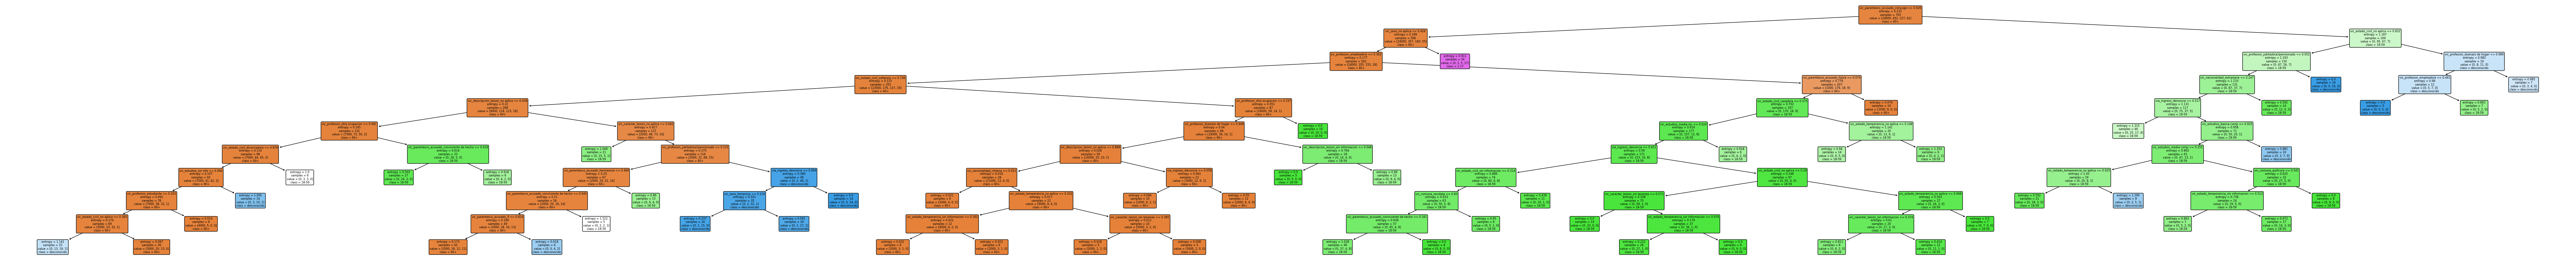

Feature Ranking:
1. feature vic_parentesco_acusado_conyuge (0.2145)
2. feature vic_parentesco_acusado_hijo/a (0.1737)
3. feature vic_profesion_empleado/a (0.1168)
4. feature vic_profesion_otra ocupacion (0.0879)
5. feature vic_profesion_jubilado(a)/pensionado (0.0693)
6. feature vic_sexo_no aplica (0.0641)
7. feature vic_estado_civil_no aplica (0.0494)
8. feature vic_estado_civil_soltero/a (0.0406)
9. feature vic_profesion_duena/o de hogar (0.0361)
10. feature vic_descripcion_lesion_no aplica (0.0254)


In [136]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt  # Corregido aquí
from sklearn.tree import plot_tree

# Definir las características a eliminar
features_to_drop = [
    'id_causa',
    'vic_parentesco_acusado_otro', 
    'vic_estado_temperancia_otro', 
    'vic_descripcion_temperancia', 
    'dtn_descripcion_temperancia',
    'vic_nacionalidad_Extranjera',
    'vic_parentesco_acusado_otro',
    'vic_estado_temperancia_otro',
    'dtn_descripcion_temperancia',
    'fecha_ingreso'
]

# Eliminar las características seleccionadas
df_combinado_victimas_denunciantes_reduced = df_combinado_victimas_denunciantes.drop(columns=features_to_drop)

# Codificación One-Hot para variables categóricas
df_encoded_reduced = pd.get_dummies(df_combinado_victimas_denunciantes_reduced.drop('rango_edad', axis=1))

# Separar la variable objetivo
X = df_encoded_reduced
y = df_combinado_victimas_denunciantes_reduced['rango_edad']

class_weights = {
    '60+': 1,  # Aumentar el peso de la clase '60+' en el entrenamiento
    '18-59':1,
    '1-17': 1000,
    'desconocido':1
    # Añade aquí el resto de las clases con sus respectivos pesos
}
# Crear un nuevo modelo de árbol de decisión con los mejores parámetros encontrados
best_model = DecisionTreeClassifier(
    class_weight=class_weights,
    criterion='entropy',
    max_depth= 10,
    max_features='sqrt',
    min_samples_leaf=5,
    min_samples_split=2,
    splitter='random',
    random_state=4
)

# Entrenar el modelo con el conjunto de datos completo
best_model.fit(X, y)

# Obtener los nombres de las clases automáticamente
class_names = y.unique()

# Visualizar el árbol de decisión
plt.figure(figsize=(100, 10))  # Ajusta el tamaño según sea necesario
plot_tree(best_model, 
          filled=True, 
          rounded=True, 
          class_names=class_names,  # Usar los nombres de las clases obtenidos
          feature_names=df_encoded_reduced.columns,fontsize=6,max_depth=10)

# Opcional: Guardar la visualización en un archivo
plt.savefig("decision_tree_arbol.svg", format='svg', bbox_inches="tight")
plt.savefig("decision_tree_arbol.pdf", format='pdf', bbox_inches="tight")
plt.show()  

# Imprimir la importancia de las características (todas)
importances = best_model.feature_importances_
indices = (-importances).argsort()  # Obtener los índices de las características ordenadas por importancia
feature_names = df_encoded_reduced.columns.tolist()
print("Feature Ranking:")
for f in range(10):  # Itera sobre todas las características
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")


In [137]:
df_combinado_victimas_denunciantes_reduced
# Estadísticas descriptivas
print(df_combinado_victimas_denunciantes_reduced.describe())



        vic_sexo vic_nacionalidad vic_profesion vic_estudios  \
count        765              765           765          765   
unique         3                3             9           13   
top     femenino          chilena    empleado/a    no aplica   
freq         584              647           285          275   

       vic_parentesco_acusado vic_caracter_lesion vic_descripcion_lesion  \
count                     765                 765                    765   
unique                     32                   4                      4   
top                   conyuge           no aplica              no aplica   
freq                      169                 299                    382   

       vic_estado_temperancia vic_comuna vic_estado_civil via_ingreso  \
count                     765        765              765         765   
unique                      4         27                9           3   
top                 no aplica      maipu        no aplica    denuncia   
freq  

In [138]:
df_combinado_victimas_denunciantes

,id_causa,vic_sexo,vic_nacionalidad,vic_nacionalidad_Extranjera,vic_profesion,vic_estudios,vic_parentesco_acusado,vic_parentesco_acusado_otro,vic_caracter_lesion,vic_descripcion_lesion,vic_estado_temperancia,vic_estado_temperancia_otro,vic_descripcion_temperancia,vic_comuna,vic_estado_civil,dtn_descripcion_temperancia,fecha_ingreso,via_ingreso,rango_edad
0,1,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,9,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN,2019-01-02,demanda,60+
1,1,masculino,chilena,no aplica,jubilado(a)/pensionado,no aplica,padre/madre,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN,2019-01-02,demanda,60+
2,2,femenino,chilena,no aplica,empleado/a,tecnico profesional inc,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,soltero/a,NaN,2019-01-02,denuncia,18-59
3,6,femenino,extranjera,haitiana,no aplica,no aplica,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,conchali,no aplica,NaN,2019-01-02,demanda,desconocido
4,7,masculino,no aplica,no aplica,no aplica,no aplica,18,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,2019-01-03,denuncia,18-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,547,femenino,extranjera,peruano/peruana,empleado/a,tecnico profesional comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,estado normal,no aplica,NaN,santiago,separado/a,sin informacion,2021-12-20,denuncia,18-59
761,548,femenino,chilena,no aplica,empleado/a,no aplica,ex pareja,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,huechuraba,no aplica,no aplica,2021-12-21,demanda,18-59
762,549,femenino,chilena,no aplica,empleado/a,profesional comp,ex conyuge,no aplica,sin lesiones,sin informacion,sin informacion,no aplica,NaN,la reina,separado/a,sin informacion,2021-12-21,denuncia,18-59
763,550,femenino,chilena,no aplica,empleado/a,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,cerro navia,separado/a,no aplica,2021-12-27,demanda,18-59


In [139]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Suponemos que 'df' es tu DataFrame y ya tiene las columnas 'vic_nacionalidad_Extranjera', 'vic_descripcion_lesion' y 'vic_nacionalidad' eliminadas

# Convierte las variables categóricas en un formato de one-hot encoding
df_encoded = pd.get_dummies(df)

# Aplica el algoritmo Apriori para encontrar conjuntos de ítems frecuentes
frecuentes = apriori(df_encoded, min_support=0.2, use_colnames=True)
print(frecuentes)
# Genera reglas de asociación
reglas = association_rules(frecuentes, metric="confidence", min_threshold=0.6)

# Define una función para filtrar los términos no deseados y retener solo reglas que contienen ciertos términos
def filter_terms(itemset):
    terms_to_exclude = {'no aplica', 'sin informacion'}
    terms_to_include = {'vic_parentesco_acusado', 'rango_edad'}
    return (not any(term in item for item in itemset for term in terms_to_exclude) and 
            any(term in str(itemset) for term in terms_to_include))

# Hacer una copia del DataFrame para evitar SettingWithCopyWarning
reglas_filtradas = reglas.copy()

# Aplica el filtro a los antecedentes y consecuentes
reglas_filtradas = reglas_filtradas[reglas_filtradas['antecedents'].apply(filter_terms) | reglas_filtradas['consequents'].apply(filter_terms)]

# Agrega nuevas columnas con el método .loc para evitar advertencias
reglas_filtradas.loc[:, 'num_antecedents'] = reglas_filtradas['antecedents'].apply(lambda x: len(x))
reglas_filtradas.loc[:, 'num_consequents'] = reglas_filtradas['consequents'].apply(lambda x: len(x))

# Filtra las reglas por el número de ítems en el antecedente y el consecuente
reglas_filtradas = reglas_filtradas[(reglas_filtradas['num_antecedents'] <= 1) & (reglas_filtradas['num_consequents'] <= 2)]

# Ordena las reglas por lift y muestra las primeras 10
reglas_ordenadas = reglas_filtradas.sort_values(by='lift', ascending=False)

print(reglas_filtradas)
# Imprime el DataFrame de reglas ordenadas sin limitar el número de reglas
#print(reglas_ordenadas[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))


Empty DataFrame
Columns: [support, itemsets]
Index: []


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [ ]:
print(df_normalizado_denunciados['vif_resultado_nivel'].unique())


['no aplica' 'sin informacion' 'medio' 'bajo' 'alto']


In [ ]:
df_normalizado_denunciados = df_normalizado_denunciados[df_normalizado_denunciados['vif_resultado_nivel'].isin(['alto', 'bajo', 'medio'])]
columnas = [
    'vif_hijos_menores',
    'vif_hecho_golpes',
    'vif_hecho_lesiones',
    'vif_hecho_amenaza_muerte',
    'vif_hecho_uso_arma',
    'vif_hecho_violencia_sexual',
    'vif_denunciado_acceso_armas',
    'vif_denunciado_consumo_sustancias',
    'vif_denunciado_violencia_consumo',
    'vif_denunciado_trastorno_psiquiatrico',
    'vif_historia_golpes_previos',
    'vif_historia_aumento_golpes',
    'vif_historia_amenaza_arma',
    'vif_historia_amenaza_muerte_previa',
    'vif_historia_violencia_menores',
    'vif_historia_celos_violentos',
    'vif_historia_separacion',
    'vif_historia_rechazo_separacion',
    'vif_usted_discapacidad',
    'vif_usted_embarazo',
    'vif_usted_convivencia_denunciado',
    'vif_usted_dependencia_economica',
    'vif_reaccion_denuncia_agresion',
    'vif_reaccion_denuncia_riesgo_fatal',
    'vif_imputado_denuncias_vif',
    'vif_imputado_condenas_vif',
    'vif_imputado_desacato_vif',
    'vif_imputado_delitos_pendientes',
    'vif_resultado_nivel'
]
 
df_normalizado_denunciados = df_normalizado_denunciados[columnas]

KeyError: 'vif_resultado_nivel'

In [ ]:
df_normalizado_denunciados


,vif_hijos_menores,vif_hecho_golpes,vif_hecho_lesiones,vif_hecho_amenaza_muerte,vif_hecho_uso_arma,vif_hecho_violencia_sexual,vif_denunciado_acceso_armas,vif_denunciado_consumo_sustancias,vif_denunciado_violencia_consumo,vif_denunciado_trastorno_psiquiatrico,...,vif_usted_embarazo,vif_usted_convivencia_denunciado,vif_usted_dependencia_economica,vif_reaccion_denuncia_agresion,vif_reaccion_denuncia_riesgo_fatal,vif_imputado_denuncias_vif,vif_imputado_condenas_vif,vif_imputado_desacato_vif,vif_imputado_delitos_pendientes,vif_resultado_nivel
4,no,no,no,no,no,no,no sabe,si,no,si,...,no,no,no,si,si,no sabe,si,no,no,medio
7,no,no,no,no,no,no,no,si,no,no,...,no,no,no,si,no,si,no,si,no,bajo
11,si,no,no,no,no,no,no,no,no,no,...,no,no,no,si,no,no,no,no,no,bajo
12,si,no,no,no,no,no,no,no,no,no,...,no,no,si,no,no,no,no,no,no,medio
13,si,no,no,no,no,no,no,si,no,no,...,no,si,no,no,no,no,no,no,si,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,si,no,no,no,no,no,no,no,no,no,...,no,no,si,no,no,si,no,no,no,bajo
655,no,no,no,no,no,no,no,no,no,no,...,no,si,no,no sabe,no,no,no,no,no,bajo
659,si,no,no,no,no,no,no,no,no,no,...,no,si,no,no sabe,no,no,no,no,no,bajo
665,si,no,no,no,no,no,no,no,no,no,...,no,no,si,no sabe,no,no,no,no,no,bajo


In [ ]:
df_combinado_victimas_denunciantes

,id_causa,vic_sexo,vic_nacionalidad,vic_nacionalidad_Extranjera,vic_profesion,vic_estudios,vic_parentesco_acusado,vic_parentesco_acusado_otro,vic_caracter_lesion,vic_descripcion_lesion,vic_estado_temperancia,vic_estado_temperancia_otro,vic_descripcion_temperancia,vic_comuna,vic_estado_civil,dtn_descripcion_temperancia,fecha_ingreso,via_ingreso,rango_edad
0,1,femenino,chilena,no aplica,jubilado(a)/pensionado,no aplica,9,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN,2019-01-02,demanda,60+
1,1,masculino,chilena,no aplica,jubilado(a)/pensionado,no aplica,padre/madre,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,huechuraba,casado/a,NaN,2019-01-02,demanda,60+
2,2,femenino,chilena,no aplica,empleado/a,tecnico profesional inc,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,soltero/a,NaN,2019-01-02,denuncia,18-59
3,6,femenino,extranjera,haitiana,no aplica,no aplica,8,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,conchali,no aplica,NaN,2019-01-02,demanda,desconocido
4,7,masculino,no aplica,no aplica,no aplica,no aplica,18,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,2019-01-03,denuncia,18-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,547,femenino,extranjera,peruano/peruana,empleado/a,tecnico profesional comp,ex conviviente de hecho,no aplica,sin lesiones,sin informacion,estado normal,no aplica,NaN,santiago,separado/a,sin informacion,2021-12-20,denuncia,18-59
761,548,femenino,chilena,no aplica,empleado/a,no aplica,ex pareja,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,huechuraba,no aplica,no aplica,2021-12-21,demanda,18-59
762,549,femenino,chilena,no aplica,empleado/a,profesional comp,ex conyuge,no aplica,sin lesiones,sin informacion,sin informacion,no aplica,NaN,la reina,separado/a,sin informacion,2021-12-21,denuncia,18-59
763,550,femenino,chilena,no aplica,empleado/a,no aplica,conyuge,no aplica,no aplica,no aplica,no aplica,no aplica,NaN,cerro navia,separado/a,no aplica,2021-12-27,demanda,18-59


In [ ]:
mapeo = {'si': 1, 'no': 0, 'no sabe': -1, 'sin información': -1}

# Aplicar el mapeo a cada columna relevante excepto a las columnas especificadas
for columna in df_normalizado_denunciados.columns:
    if columna not in ['vif_resultado_nivel'] and df_normalizado_denunciados[columna].dtype == 'object':
        df_normalizado_denunciados[columna] = df_normalizado_denunciados[columna].map(mapeo)

# Filtrar las filas
df_normalizado_denunciados = df_normalizado_denunciados[df_normalizado_denunciados['vif_resultado_nivel'].isin(['alto', 'bajo', 'medio'])]

# Crear variables dummy para la columna objetivo
df_resultado_nivel_dummies = pd.get_dummies(df_normalizado_denunciados['vif_resultado_nivel'], prefix='nivel')
df_normalizado_denunciados = df_normalizado_denunciados.drop(['vif_resultado_nivel'], axis=1)
df_normalizado_denunciados = pd.concat([df_normalizado_denunciados, df_resultado_nivel_dummies], axis=1)


In [ ]:
df_normalizado_denunciados

,vif_hijos_menores,vif_hecho_golpes,vif_hecho_lesiones,vif_hecho_amenaza_muerte,vif_hecho_uso_arma,vif_hecho_violencia_sexual,vif_denunciado_acceso_armas,vif_denunciado_consumo_sustancias,vif_denunciado_violencia_consumo,vif_denunciado_trastorno_psiquiatrico,...,vif_usted_dependencia_economica,vif_reaccion_denuncia_agresion,vif_reaccion_denuncia_riesgo_fatal,vif_imputado_denuncias_vif,vif_imputado_condenas_vif,vif_imputado_desacato_vif,vif_imputado_delitos_pendientes,nivel_alto,nivel_bajo,nivel_medio
4,0.0,0.0,0,0,0,0,-1,1,0.0,1.0,...,0,1.0,1,-1,1,0,0.0,False,False,True
7,0.0,0.0,0,0,0,0,0,1,0.0,0.0,...,0,1.0,0,1,0,1,0.0,False,True,False
11,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,1.0,0,0,0,0,0.0,False,True,False
12,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,1,0.0,0,0,0,0,0.0,False,False,True
13,1.0,0.0,0,0,0,0,0,1,0.0,0.0,...,0,0.0,0,0,0,0,1.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,1,0.0,0,1,0,0,0.0,False,True,False
655,0.0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,-1.0,0,0,0,0,0.0,False,True,False
659,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,-1.0,0,0,0,0,0.0,False,True,False
665,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,1,-1.0,0,0,0,0,0.0,False,True,False


In [ ]:
# Calcular la media de cada columna
medias = df_normalizado_denunciados.mean()

# Rellenar los NaN con la media de su respectiva columna
df_normalizado_denunciados.fillna(medias, inplace=True)


In [ ]:
print(df_normalizado_denunciados.isna().any().any())

False


In [ ]:
# Convertir todas las columnas de tipo 'int' y 'float' a 'float32'
for columna in df_normalizado_denunciados.columns:
    if df_normalizado_denunciados[columna].dtype == 'int' or df_normalizado_denunciados[columna].dtype == 'float':
        df_normalizado_denunciados[columna] = df_normalizado_denunciados[columna].astype('float32')


In [ ]:
df_normalizado_denunciados

,vif_hijos_menores,vif_hecho_golpes,vif_hecho_lesiones,vif_hecho_amenaza_muerte,vif_hecho_uso_arma,vif_hecho_violencia_sexual,vif_denunciado_acceso_armas,vif_denunciado_consumo_sustancias,vif_denunciado_violencia_consumo,vif_denunciado_trastorno_psiquiatrico,...,vif_usted_dependencia_economica,vif_reaccion_denuncia_agresion,vif_reaccion_denuncia_riesgo_fatal,vif_imputado_denuncias_vif,vif_imputado_condenas_vif,vif_imputado_desacato_vif,vif_imputado_delitos_pendientes,nivel_alto,nivel_bajo,nivel_medio
4,0.0,0.0,0,0,0,0,-1,1,0.0,1.0,...,0,1.000000,1,-1,1,0,0.0,False,False,True
7,0.0,0.0,0,0,0,0,0,1,0.0,0.0,...,0,1.000000,0,1,0,1,0.0,False,True,False
11,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,1.000000,0,0,0,0,0.0,False,True,False
12,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,1,0.000000,0,0,0,0,0.0,False,False,True
13,1.0,0.0,0,0,0,0,0,1,0.0,0.0,...,0,0.000000,0,0,0,0,1.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,1,0.000000,0,1,0,0,0.0,False,True,False
655,0.0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,-1.000000,0,0,0,0,0.0,False,True,False
659,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,-1.000000,0,0,0,0,0.0,False,True,False
665,1.0,0.0,0,0,0,0,0,0,0.0,0.0,...,1,-1.000000,0,0,0,0,0.0,False,True,False
